# Executive Summary

# Introduction

In [1]:
library(plyr)
library(dplyr)
library(ggplot2)
library(MASS)
library(cowplot)
library(forcats)
library(ggforce)
library(ggrepel)
library(scales)
library(tidyr)
library(xts)
library(zoo)
library(ggraph)
library(igraph)
library(knitr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘igraph’

The following object 

In [73]:
DrawPitch <- function(lengthPitch=105, widthPitch=68, arrow=c("none", "r", "l"), theme=c("light", "dark", "grey", "grass")) {
    #' Draw regulation football pitch with penalty areas and centre circle.
    #' Adapted from https://github.com/JoGall/soccermatics
  
  # define colours by theme
  if(theme[1] == "grass") {
    fill1 <- "#008000"
    fill2 <- "#328422"
    colPitch <- "grey85"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "light") {
    fill1 <- "grey98"
    fill2 <- "grey98"
    colPitch <- "grey60"
    arrowCol = "black"
    colText <- "black"
  } else if(theme[1] %in% c("grey", "gray")) {    
    fill1 <- "#A3A1A3"
    fill2 <- "#A3A1A3"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "black"
  } else if(theme[1] == "dark") {  
    fill1 <- "#1C1F26"
    fill2 <- "#1C1F26"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "blank") {
    fill1 <- "white"
    fill2 <- "white"
    colPitch <- "white"
    arrowCol <- "black"
    colText <- "black"
  }
  lwd <- 0.5
  
  border <- c(5, 5, 5, 5)
      
  # mowed grass lines
  lines <- (lengthPitch + border[2] + border[4]) / 13
  boxes <- data.frame(start = lines * 0:12 - border[4], end = lines * 1:13 - border[2])[seq(2, 12, 2),]
  
  # draw pitch
  p <- ggplot() +
    # background
    geom_rect(aes(xmin = -border[4], xmax = lengthPitch + border[2], ymin = -border[3], ymax = widthPitch + border[1]), fill = fill1) +
    # mowed pitch lines
    geom_rect(data = boxes, aes(xmin = start, xmax = end, ymin = -border[3], ymax = widthPitch + border[1]), fill = fill2) +
    # perimeter line
    geom_rect(aes(xmin = 0, xmax = lengthPitch, ymin = 0, ymax = widthPitch), fill = NA, col = colPitch, lwd = lwd) +
    # centre circle
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 9.15), col = colPitch, lwd = lwd) +
    # kick off spot
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # halfway line
    geom_segment(aes(x = lengthPitch/2, y = 0, xend = lengthPitch/2, yend = widthPitch), col = colPitch, lwd = lwd) +
    # penalty arcs
    geom_arc(aes(x0= 11, y0 = widthPitch/2, r = 9.15, start = pi/2 + 0.9259284, end = pi/2 - 0.9259284), col = colPitch, lwd = lwd) +
    geom_arc(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 9.15, start = pi/2*3 - 0.9259284, end = pi/2*3 + 0.9259284), 
             col = colPitch, lwd = lwd) +
    # penalty areas
    geom_rect(aes(xmin = 0, xmax = 16.5, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 16.5, xmax = lengthPitch, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), 
              fill = NA, col = colPitch, lwd = lwd) +
    # penalty spots
    geom_circle(aes(x0 = 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    geom_circle(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # six yard boxes
    geom_rect(aes(xmin = 0, xmax = 5.5, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 5.5, xmax = lengthPitch, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), 
              fill = NA, col = colPitch, lwd = lwd) +
    # goals
    geom_rect(aes(xmin = -2, xmax = 0, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch, xmax = lengthPitch + 2, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), 
              fill = NA, col = colPitch, lwd = lwd) +
    coord_fixed() +
    theme(rect = element_blank(), 
          line = element_blank(),
          axis.text = element_blank(),
          axis.title = element_blank())
    
  # add arrow
  if(arrow[1] == "r") {
    p <- p + 
      geom_segment(aes(x = 0, y = -2, xend = lengthPitch / 3, yend = -2), 
                   colour = arrowCol, size = 1.5, arrow = arrow(length = unit(0.2, "cm"), type="closed"), linejoin='mitre')
  } else if(arrow[1] == "l") {
    p <- p + 
      geom_segment(aes(x = lengthPitch, y = -2, xend = lengthPitch / 3 * 2, yend = -2), 
                   colour = arrowCol, size = 1.5, arrow = arrow(length = unit(0.2, "cm"), type="closed"), linejoin='mitre')
  }
      
  return(p)
}

# Data

In [74]:
LoadAndScaleData <- function(national_league) {
    #' Load preprocessed event logs for given national league.
    
    events <- read.csv(paste0('../data/processed_events_', national_league, '.csv'))

    x_scale <- 105
    y_scale <- 68

    events$location_x <- events$location_x/100 * x_scale
    events$target_x <- events$target_x/100 * x_scale

    events$location_y <- y_scale - (events$location_y/100 * y_scale)
    events$target_y <- y_scale - (events$target_y/100 * y_scale)
    
    return(events)
}


In [66]:
events <- LoadAndScaleData('England')

In [672]:
ShowMatchEvents <- function(events, match_id, team_name, home_or_away='Home') {
    #' Visualize events on pitch for given match and team.
    
    # select match
    game <- events[events$matchId==match_id,]
    goals <- game[game$subEventName=='Goal',]
    
    # note teams
    teams <- unique(game$team)

    # limit events to team specified by name or home/away
    if(!missing(team_name)){
        game <- game[game$team==team_name,]
        home_or_away <- unique(game$home_or_away)
    } else {
        game <- game[game$home_or_away==home_or_away,]
        team_name <- unique(game$team)
    }
    
    # note opposition
    opposition <- teams[teams!=team_name]
    
    # get score
    team_score <- table(goals$team)[team_name]
    opposition_score <- table(goals$team)[opposition]
    
    # limit attention to main events
    game_events <- game[game$eventName == 'Pass'| 
                        game$eventName == 'Shot' | 
                        game$eventName == 'On the Ball' | 
                        game$eventName == 'Challenge' | 
                        game$eventName == 'Free Kick',]

    # draw pitch
    p <- DrawPitch(theme='grey', arrow='r') + 
        geom_point(data = game_events, 
               aes(location_x , location_y, fill=eventName), pch=21, alpha=0.6, size=2 ) + 
        geom_point(data=game_events[game_events$subEventName=='Goal',], 
                   aes(location_x, location_y), shape=13, size=5) +
        geom_label_repel(data=game_events[game_events$subEventName=='Goal',], 
                         aes(location_x, location_y, label = paste0(source,'(',matchPeriod,' ',time,')')), label.padding=0.1, size=2.3, alpha=1) +
        theme(legend.direction='horizontal', legend.position=c(0.5,0)) +
        scale_fill_manual(values=c("red", "black", 'white', "yellow", 'blue'), name='Event Type') +
        ggtitle(paste('Event Map:', team_name,'playing',home_or_away,'versus',opposition,'(',team_score,'-',opposition_score,')'))
    
    return(p)
    
}

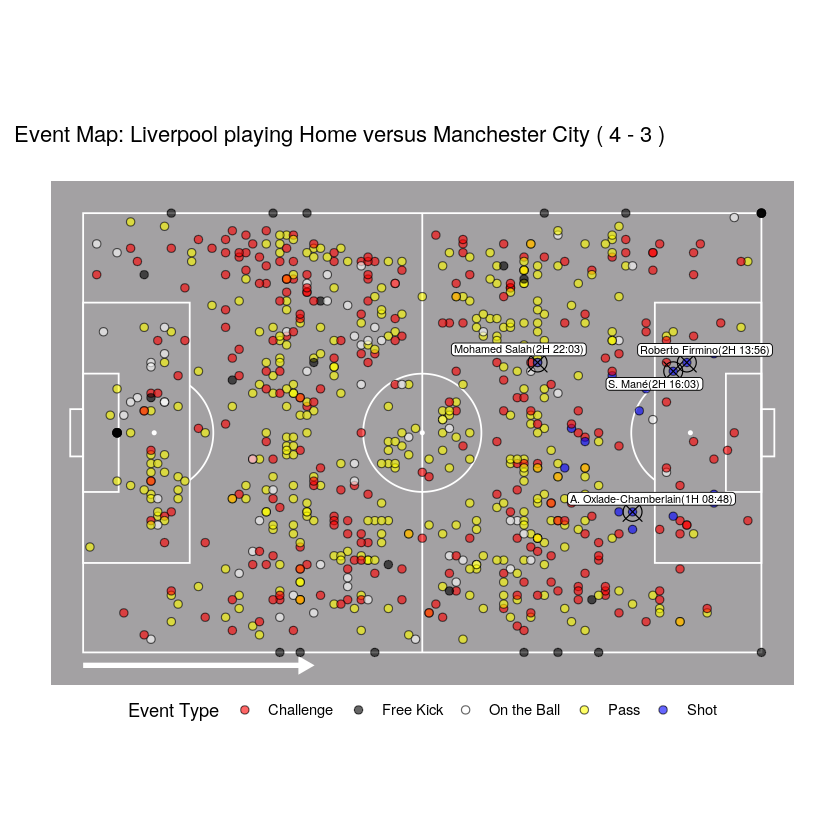

In [673]:
ShowMatchEvents(events, match_id='2499943', home_or_away='Home')

In [674]:
ShowPassesAndShots <- function(events, match_id, team_name, home_or_away='Home') {
    #' Visualize passes on pitch for given match and team.
    
    # select match
    game <- events[events$matchId==match_id,]
    goals <- game[game$subEventName=='Goal',]
    
    # note teams
    teams <- unique(game$team)

    # limit events to team specified by name or home/away
    if(!missing(team_name)){
        game <- game[game$team==team_name,]
        home_or_away <- unique(game$home_or_away)
    } else {
        game <- game[game$home_or_away==home_or_away,]
        team_name <- unique(game$team)
    }
    
    # note opposition
    opposition <- teams[teams!=team_name]
    
    # get score
    team_score <- table(goals$team)[team_name]
    opposition_score <- table(goals$team)[opposition]
    
    # limit attention to passes and shots
    passes <- game[game$eventName == 'Pass' & game$team == team_name,]
    shots <- game[(game$eventName=='Shot' | game$subEventName=='Goal') & game$team==team_name,]
    
    # draw pitch
    p <- DrawPitch(theme='grass', arrow='r') + 
        geom_segment(data=na.exclude(passes), 
                     aes(x=location_x, y=location_y, xend=target_x, yend=target_y, color=subEventName), 
                     alpha=0.6, arrow = arrow(length = unit(0.1,"cm"))) +
        geom_label_repel(data=game[game$subEventName=='Goal',], 
                     aes(location_x, location_y, label = paste0(source,'(',matchPeriod,' ',time,')')), label.padding=0.1, size=2.3, alpha=1) + 
        geom_segment(data=na.exclude(shots), 
                 aes(x=location_x, y=location_y, xend=target_x, yend=target_y, color=subEventName), 
                 alpha=0.7, arrow = arrow(length = unit(0.1,"cm"))) +
        theme(legend.position=c(0.5,-0.01), legend.direction='horizontal',
              legend.background=element_rect(fill='#008000', linetype='solid')) +
        scale_color_manual(values=c("red", "black", 'blue', 'orange', "yellow", 'grey', 'purple', 'white','brown'), name='Pass Type') +
        ggtitle(paste('Pass Map:',team_name,'playing',home_or_away,'versus',opposition,'(',team_score,'-',opposition_score,')'))
    
    return(p)
} 

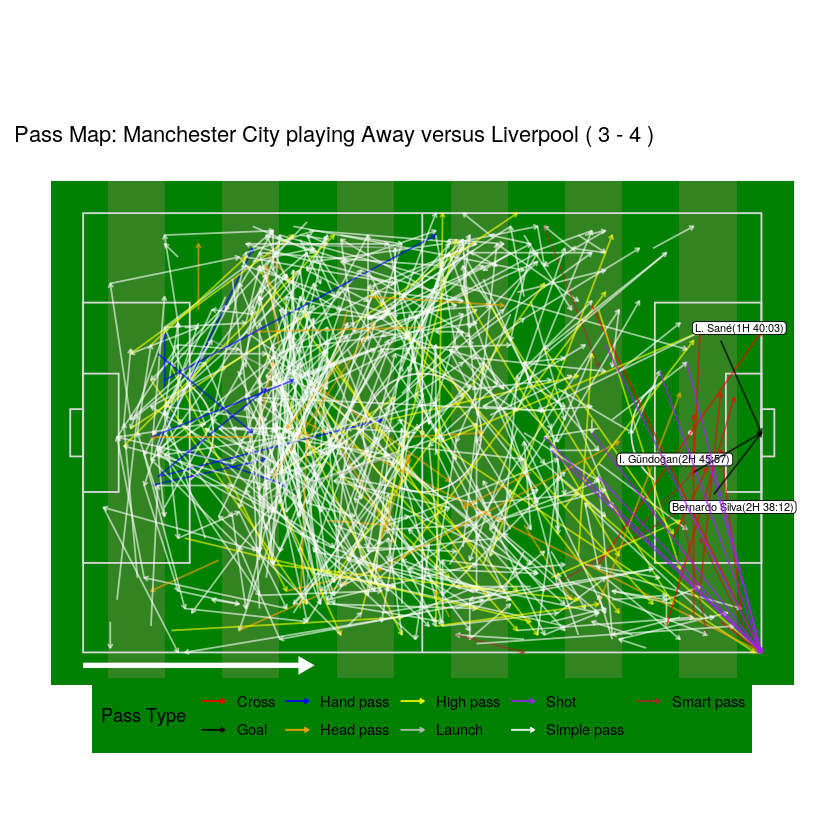

In [675]:
ShowPassesAndShots(events, '2499943', home_or_away='Away')

# Methodology

# Results

# Conclusion

In [359]:
TabulateSequence <- function(possession_sequence) {
    # Return a markdown table starting from the row before a possession sequence begins, and continuing until it ends.
    
    start <- min(events[events$possession == possession_sequence,]$X)
    stop <- max(events[events$possession == possession_sequence,]$X) + 1
    table <- events[start:stop,]
    df <- data.frame(table$matchPeriod, table$time, table$team, table$source, table$subEventName)
    names(df) <- c('Half', 'Time', 'Team', 'Event Description', 'Player')
    
    return(kable(df))
}

In [360]:
TabulateSequence(id)



|Half |Time  |Team           |Event Description     |Player                |
|:----|:-----|:--------------|:---------------------|:---------------------|
|2H   |38:07 |Crystal Palace |W. Hennessey          |Goal kick             |
|2H   |38:12 |Liverpool      |J. Matip              |Air duel              |
|2H   |38:12 |Crystal Palace |C. Benteke            |Air duel              |
|2H   |38:15 |Liverpool      |L. Karius             |Hand pass             |
|2H   |38:18 |Liverpool      |V. van Dijk           |Touch                 |
|2H   |38:22 |Liverpool      |V. van Dijk           |Simple pass           |
|2H   |38:23 |Liverpool      |J. Milner             |High pass             |
|2H   |38:27 |Liverpool      |T. Alexander-Arnold   |Simple pass           |
|2H   |38:30 |Liverpool      |A. Oxlade-Chamberlain |Touch                 |
|2H   |38:31 |Liverpool      |T. Alexander-Arnold   |Simple pass           |
|2H   |38:32 |Liverpool      |J. Henderson          |Simple pass          

In [648]:
SequenceOnPitch <- function(possession_sequence){
    #' Draw Possession Sequence on Pitch
    
    data <- events[events$possession == possession_sequence,]

    p <- DrawPitch(theme='grass') + 
        geom_point(data = data, aes(location_x , location_y)) + 
        geom_label_repel(data = data, aes(location_x, location_y, label = source), label.padding=0.1, size=2.3, alpha=1) +
        geom_curve(data = data, aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), 
                   show.legend=FALSE, size=1, alpha = 1) +
        ggtitle(paste0(nrow(data),'-part ', unique(data$team)[1], ' Possession Sequence ending with ', 
                       data[nrow(data),]$subEventName, ' by ', data[nrow(data),]$source))
    
    return(p)
}

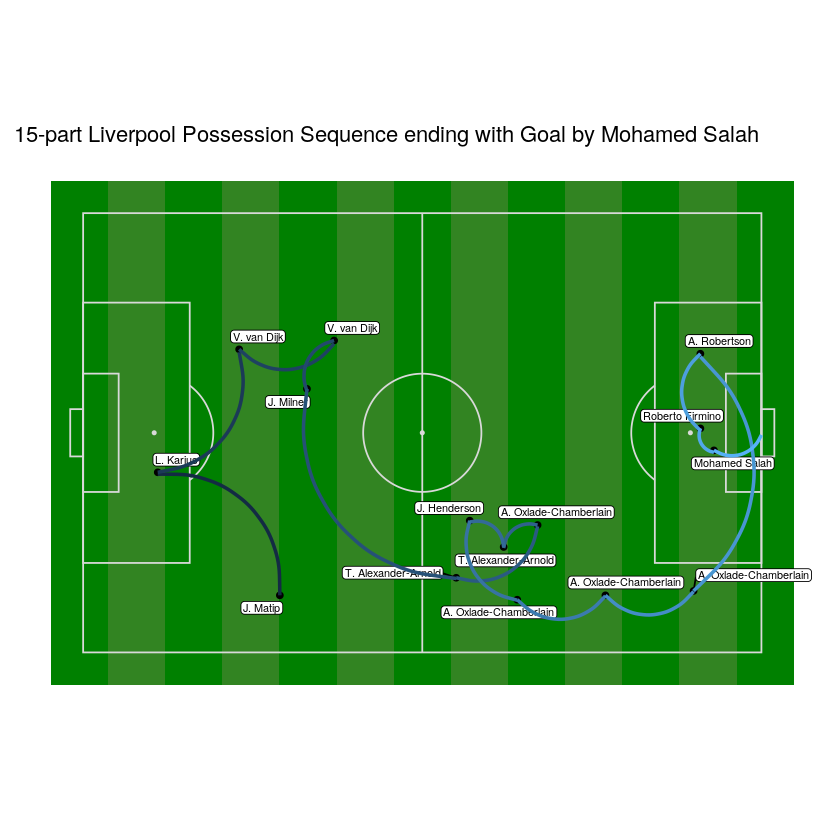

In [650]:
SequenceOnPitch('2500032-91-Liv-0')

youtube clip
<img src="../figures/youtube_clip.gif" width='700'>

In [392]:
id <-  '2500032-29-Liv-0'

In [515]:
SequenceGraph <- function(possession_sequence){
    #' Return Graph of Possession Sequence
    
    data <- events[events$possession == possession_sequence,]
    nodes <- unique(c(as.character(data$source),as.character(data$target)))
    edges <- data.frame(data$source, data$target)
    g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
    g$sequence <- possession_sequence
    
    return(g)
}

In [509]:
VisualizeGraph <- function(possession_sequence_graph) {
    #' Visualize Possession Sequence as Linear Graph with Looping Edges
    
    visualization <- ggraph(g, 'linear') + 
        geom_edge_arc(aes(color=data$eventName), 
                      arrow=arrow(length=unit(4,'mm')), 
                      fold=F,
                     width=1) +
        geom_edge_loop(aes(color=data$eventName),
                      width=1) +
        geom_node_point(color='black', 
#                         size=2*sqrt(degree(g)), 
#                         size=page_rank(g)$vector*30,
                        size=2,
                        alpha=0.5) +
        geom_node_text(aes(label = name), 
                        repel=T, 
                        angle=90, hjust=2, ) +
        scale_edge_colour_manual(
            values=c('indianred3', 'wheat4', 'grey', 'grey30'),
            name='Event Type') +
        theme_void()
   
    return(visualization)
    
}

In [516]:
g <- SequenceGraph(id)

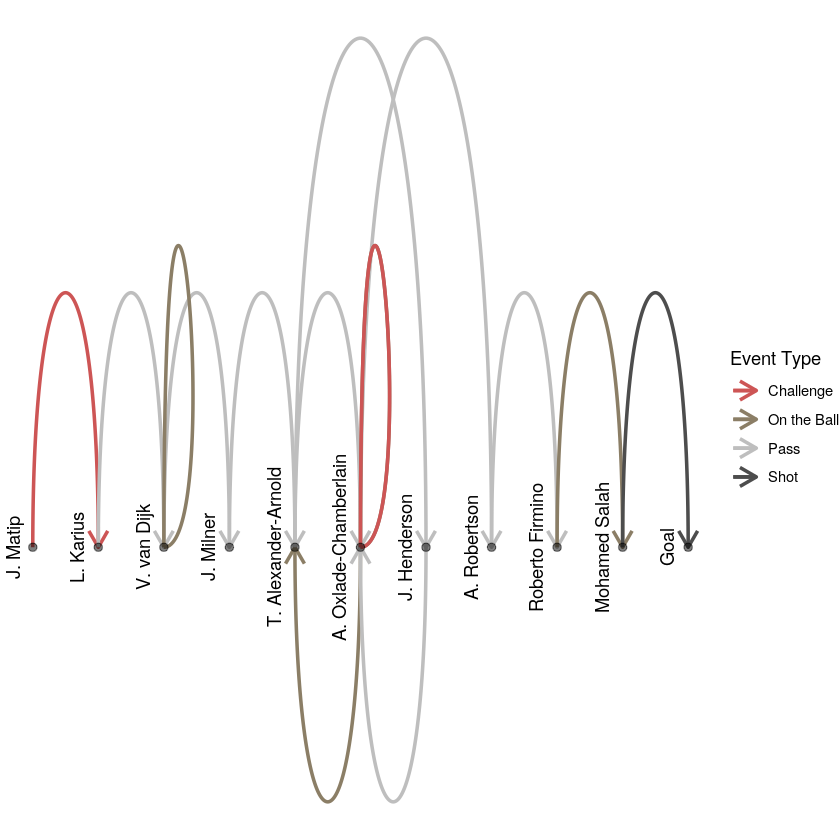

In [510]:
VisualizeGraph(g)

In [602]:
GetGraphMetrics <- function(possession_graph) {
    
    g <- possession_graph
    path_metrics <- c(g$sequence, length(V(g)), length(E(g)), 
                      diameter(g), mean_distance(g), edge_density(g, loops=T), 
                      girth(g)$girth, transitivity(g), authority_score(g)$value, hub_score(g)$value)
    names(path_metrics) <- c('Possession_Sequence', 'Nodes', 'Edges', 'Diameter', 'Mean_Distance', 
                             'Edge_Density', 'Girth', 'Transitivity', 'Authority_Score', 'Hub_Score')
    
    return(path_metrics)
}

In [624]:
GetNodeMetrics <- function(possession_graph) {
    
    g <- possession_graph
    df <- data.frame(page_rank(g)$vector)
    names(df) <- 'pagerank'
    df$in_degree <- degree(g, mode='in')
    df$out_degree <- degree(g, mode='out')
    df$eccentricity <- eccentricity(g)
    df$closeness <- closeness(g)
    df$betweenness <- betweenness(g)
    df$norm_betweenness <- betweenness(g, normalized=T)
    df$alpha_centrality <- alpha_centrality(g)
    df$power_centrality <- power_centrality(g)
    df$eigen_centrality <- eigen_centrality(g)$value
    df$authority <- authority_score(g)$vector
    df$hub <- hub_score(g)$vector
    
    return(df)
}

In [623]:
GetEdgeMetrics <- function(possession_graph) {
    
    g <- possession_graph
    df <- data.frame(as_edgelist(g))
    names(df) <- c('Source','Target')
    df$sequence <- 1:length(E(g))
    df$edge_betweenness <- edge_betweenness(g)
    
    return(df)
}

In [603]:
GetGraphMetrics(g)

Possession_Sequence               Nodes               Edges            Diameter 
 "2500032-91-Liv-0"                "11"                "15"                 "9" 
      Mean_Distance        Edge_Density               Girth        Transitivity 
 "3.44827586206897"  "0.12396694214876"                 "3" "0.230769230769231"

In [625]:
GetNodeMetrics(g)

Warning message in closeness(g):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”

,pagerank,in_degree,out_degree,eccentricity,closeness,betweenness,norm_betweenness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
J. Matip,0.02128503,0,1,9,0.020000000,0,0.0000000
L. Karius,0.03937731,1,1,8,0.019607843,9,0.1000000
V. van Dijk,0.09522738,2,2,7,0.018867925,16,0.1777778
J. Milner,0.06175667,1,1,6,0.017857143,21,0.2333333
T. Alexander-Arnold,0.12450949,2,2,5,0.016666667,25,0.2777778
A. Oxlade-Chamberlain,0.23873547,4,4,5,0.017543860,25,0.2777778
J. Henderson,0.07420156,1,1,5,0.016393443,0,0.0000000
A. Robertson,0.07201632,1,1,6,0.012048193,21,0.2333333
Roberto Firmino,0.08249890,1,1,7,0.010989011,16,0.1777778


In [622]:
GetEdgeMetrics(g)

Source,Target,edge_betweenness,sequence
<fct>,<fct>,<dbl>,<int>
J. Matip,L. Karius,10,1
L. Karius,V. van Dijk,18,2
V. van Dijk,V. van Dijk,0,3
V. van Dijk,J. Milner,24,4
J. Milner,T. Alexander-Arnold,28,5
T. Alexander-Arnold,A. Oxlade-Chamberlain,25,6
A. Oxlade-Chamberlain,T. Alexander-Arnold,3,7
T. Alexander-Arnold,J. Henderson,6,8
J. Henderson,A. Oxlade-Chamberlain,6,9


In [635]:
power_centrality(g)

J. Matip             L. Karius           V. van Dijk 
           -1.0958141            -1.2175713            -1.3393284 
            J. Milner   T. Alexander-Arnold A. Oxlade-Chamberlain 
           -1.4610855            -1.5828426            -0.9740570 
         J. Henderson          A. Robertson       Roberto Firmino 
           -0.8522999             0.3652714             0.2435143 
        Mohamed Salah                  Goal 
            0.1217571             0.0000000

In [636]:
subgraph_centrality(g)

J. Matip             L. Karius           V. van Dijk 
8.3426446+0i 0.3525799+0i 0.3057396+0i
            J. Milner   T. Alexander-Arnold A. Oxlade-Chamberlain 
0.6015439+0i 1.2499282+0i 0.6015439+0i
         J. Henderson          A. Robertson       Roberto Firmino 
0.3057396+0i 0.0000000+0i 0.0000000+0i
        Mohamed Salah                  Goal 
0.0000000+0i 0.0000000+0i

In [557]:
transitivity(g)

[1] 0.2307692

In [566]:
edges <- E(g)

In [582]:
names(data.frame(as_edgelist(g)))

[1] "X1" "X2"

In [522]:
page_rank(g)

$vector
             J. Matip             L. Karius           V. van Dijk 
           0.02128503            0.03937731            0.09522738 
            J. Milner   T. Alexander-Arnold A. Oxlade-Chamberlain 
           0.06175667            0.12450949            0.23873547 
         J. Henderson          A. Robertson       Roberto Firmino 
           0.07420156            0.07201632            0.08249890 
        Mohamed Salah                  Goal 
           0.09140910            0.09898277 

$value
[1] 1

$options
NULL

In [527]:
df <- data.frame(rep(0, length(g)))

In [530]:
df['PageRank'] <- page_rank(g)$vector

ERROR: Error in `[<-.data.frame`(`*tmp*`, "PageRank", value = c(`J. Matip` = 0.0212850319578118, : replacement has 11 rows, data has 10


ERROR: Error in data.frame(page_rank(g)$vector, edge_betweenness(g)): arguments imply differing number of rows: 11, 15


In [367]:
c(viz, g) <- SequenceGraph(id)

[1] 0.1363636
[1] 9
[1] 0.09090909
[1] 15
[1] 11


ERROR: Error in c(viz, g) <- SequenceGraph(id): object 'viz' not found


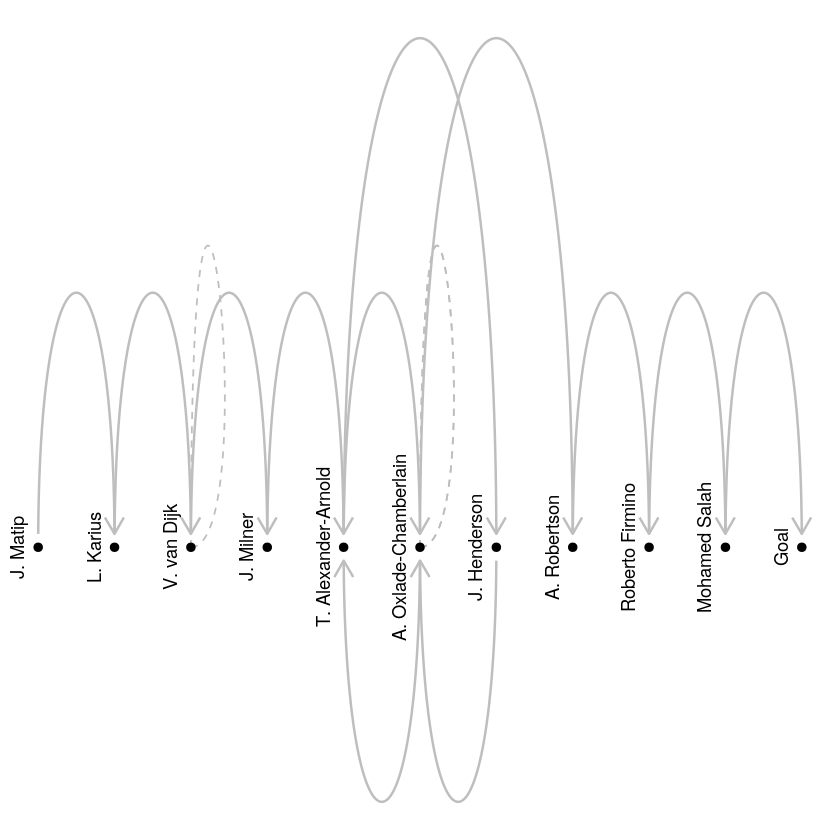

In [17]:
nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
ggraph(g, layout='linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name)), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey', linetype='dashed') +
    geom_node_point(size=2, color='black', fill='white') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    theme_void()

In [8]:
# compare goal sequences

In [18]:

goal_seqs <- unique(events[events$subEventName=='Goal',]$possession)
match_seqs <- unique(events[events$matchId == '2500032',]$possession)

In [19]:
num_events <- c()
num_players <- c()
goal_or_match <- c()
team_ <- c()

In [21]:
df <- events[events$possession == match_seqs[100],]

In [25]:
edges

data.source,data.target
<fct>,<fct>
J. Matip,L. Karius
L. Karius,V. van Dijk
V. van Dijk,V. van Dijk
V. van Dijk,J. Milner
J. Milner,T. Alexander-Arnold
T. Alexander-Arnold,A. Oxlade-Chamberlain
A. Oxlade-Chamberlain,T. Alexander-Arnold
T. Alexander-Arnold,J. Henderson
J. Henderson,A. Oxlade-Chamberlain


ERROR: Error in laplacian_matrix(g[]): Not a graph object


In [16]:
for (seq in goal_seqs) {
    df <- events[events$possession == seq,]
    num_events <- append(num_events, length(df$X))
    num_players <- append(num_players, length(unique(df$source)))
    goal_or_match <- append(goal_or_match, 'goal')
}

In [401]:
for (seq in match_seqs) {
    df <- events[events$possession == seq,]
    num_events <- append(num_events, length(df$X))
    num_players <- append(num_players, length(unique(df$source)))
#     goal_or_match <- append(goal_or_match, 'match')
    team_ <- append(team_,names(sort(summary(df$team), decreasing=T))[1])
}

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.9”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.1”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 0.9”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2.1”Warning message in predLoess(object$y, object$

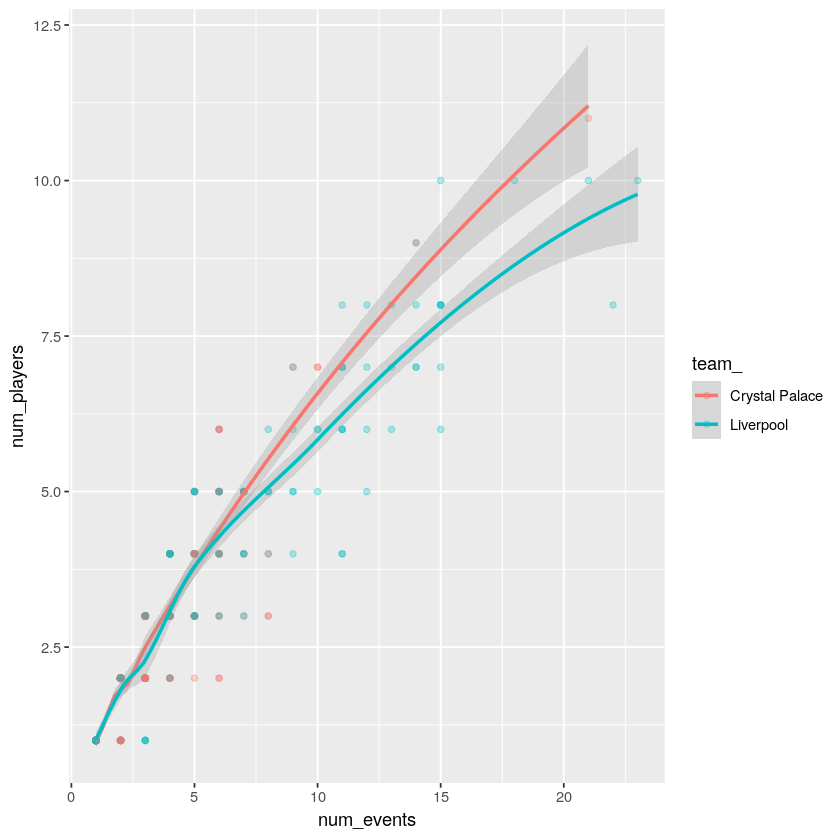

In [35]:
ggplot() +
  geom_point(aes(num_events, num_players, color=team_), alpha=0.3) +
  geom_smooth(aes(num_events, num_players, color=team_), alpha=0.3)

In [402]:
summary <- data.frame(match_seqs, num_events, num_players, num_events/num_players)

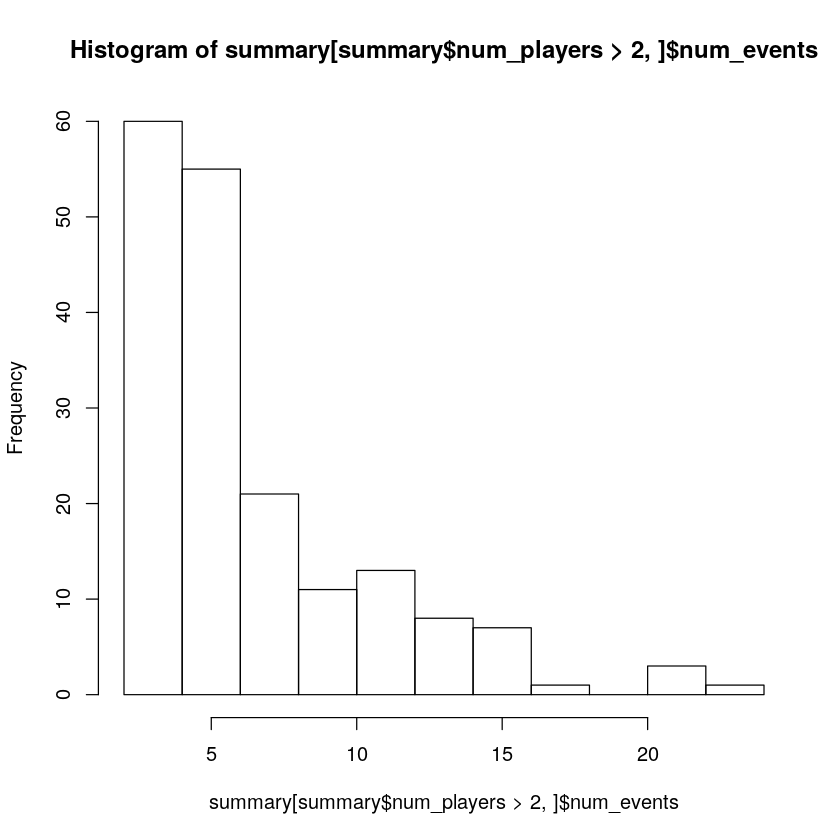

In [408]:
hist(summary[summary$num_players>2,]$num_events)

In [12]:
table <- events[233393:233405,]
df <- data.frame(table$matchPeriod, table$time, table$team, table$subEventName, table$source)
names(df) <- c('Half', 'Time', 'Team', 'Event Description', 'Player')
kable(df)



|Half |Time  |Team       |Event Description |Player                |
|:----|:-----|:----------|:-----------------|:---------------------|
|1H   |15:57 |Stoke City |Clearance         |M. Diouf              |
|1H   |16:03 |Liverpool  |Simple pass       |S. Mané               |
|1H   |16:06 |Liverpool  |Simple pass       |Alberto Moreno        |
|1H   |16:09 |Liverpool  |Simple pass       |D. Lovren             |
|1H   |16:13 |Liverpool  |Simple pass       |G. Wijnaldum          |
|1H   |16:16 |Liverpool  |Simple pass       |E. Can                |
|1H   |16:18 |Liverpool  |Simple pass       |G. Wijnaldum          |
|1H   |16:22 |Liverpool  |Simple pass       |J. Matip              |
|1H   |16:27 |Liverpool  |Simple pass       |A. Oxlade-Chamberlain |
|1H   |16:28 |Liverpool  |Cross             |J. Gomez              |
|1H   |16:31 |Liverpool  |Smart pass        |D. Solanke            |
|1H   |16:33 |Liverpool  |Goal              |S. Mané               |
|1H   |16:38 |Stoke City |Reflex

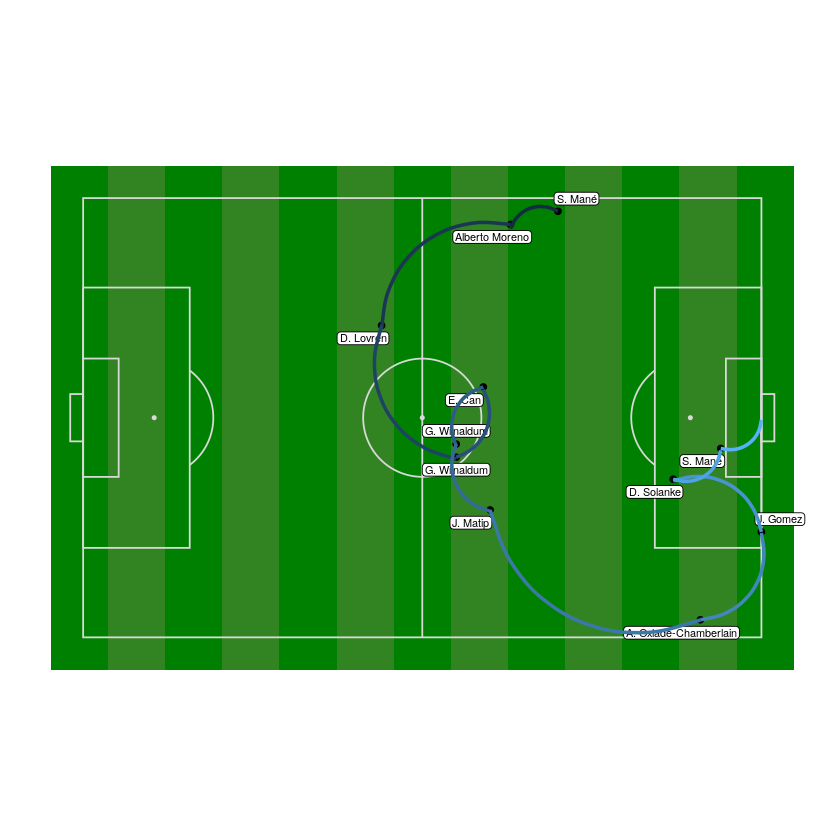

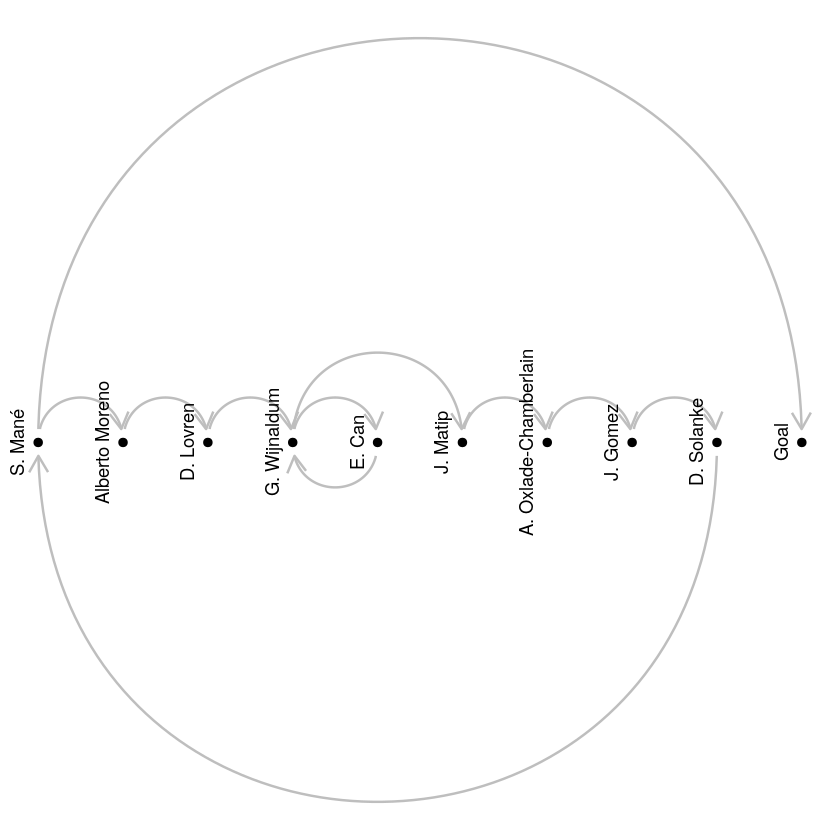

In [13]:
id <- '2499858-18-Liv-5'
data <- events[events$possession == id,]

soccerPitch(theme='grass') + geom_point(data = data,
               aes(location_x , location_y)) + 
    geom_label_repel(data = data, aes(location_x, location_y, label = source), label.padding=0.1, size=2.3, alpha=1) +
 geom_curve(data = data,
              aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), show.legend=FALSE, size=1, alpha = 1)

nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
ggraph(g, layout='linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name)), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey', linetype='dashed') +
    geom_node_point(size=2, color='black', fill='white') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    theme_void()

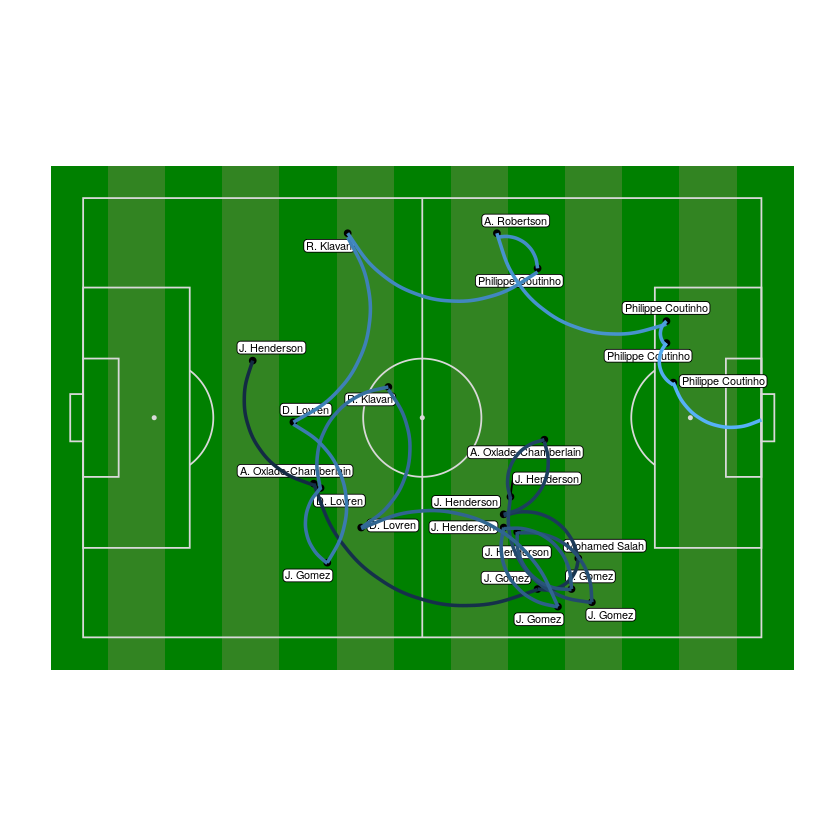

In [14]:
id <-  '2499889-18-Liv-0'
data <- events[events$possession == id,]

soccerPitch(theme='grass') + geom_point(data = data,
               aes(location_x , location_y)) + 
    geom_label_repel(data = data, aes(location_x, location_y, label = source), label.padding=0.1, size=2.3, alpha=1) +
 geom_curve(data = data,
              aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), show.legend=FALSE, size=1, alpha = 1)

<img src="../figures/youtube_clip2.gif">

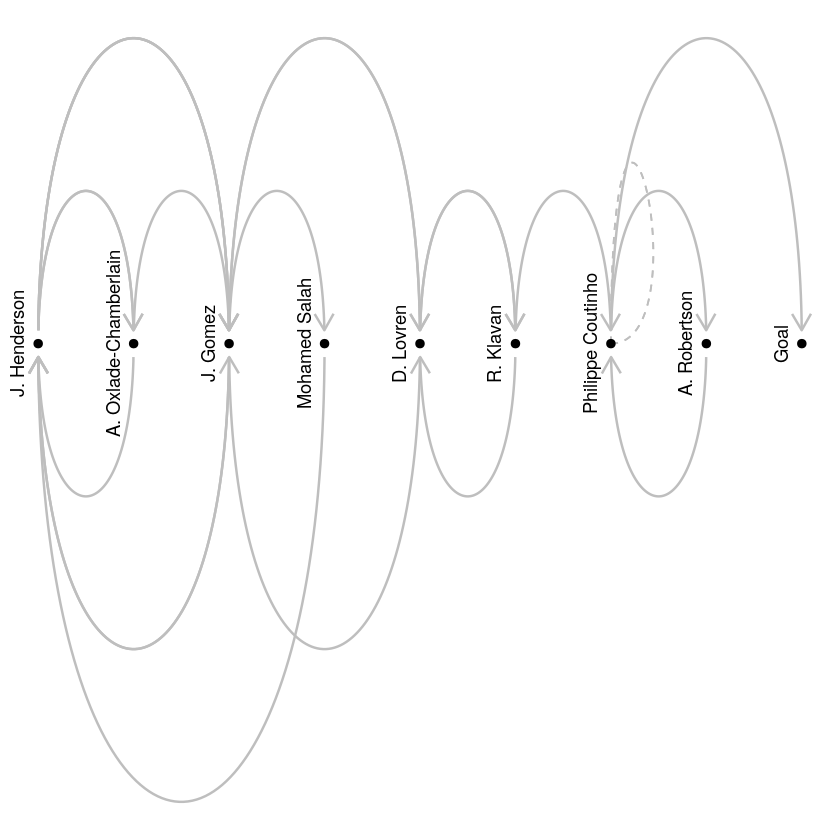

In [15]:
nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
ggraph(g, layout='linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name)), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey', linetype='dashed') +
    geom_node_point(size=2, color='black', fill='white') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    theme_void()

In [224]:
game <- events[events$matchId == '2500032' & events$team=='Liverpool',]

In [225]:

# data <- both_sides[both_sides$source!='' & both_sides$target!='' & both_sides$source!='nan' & both_sides$target!='nan',]
data <- game[game$source!='                                    ' & game$target!='                                    ' 
             & game$source!= '' & game$target!='' & game$source!='nan' & game$target!='nan',]
nodes <- unique(c(as.character(data$source),as.character(data$target)))
edges <- data.frame(data$source, data$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)

In [338]:
adj <- as.matrix(g[])

In [339]:
pseqs <- unique(game[game$team == 'Liverpool',]$possession)

In [340]:
starters <- c()
for (pseq in pseqs){
    starters <- append(starters, as.character(game[game$possession==pseq,][1,]$source))
}

In [341]:
startcounts <- table(as.factor(starters))

In [210]:
adj[names(startcounts[2]), factor('Opposition')] <- 100

In [344]:
adj[15,15] <- as.numeric(summary(match[match$team=='Crystal Palace' ,]$to_team)['Home'])

In [342]:
for (i in (2:(length(startcounts)-1))){
    adj[15,][names(startcounts[i])] <- as.numeric(startcounts[i])
}

In [345]:
adj

,J. Matip,T. Alexander-Arnold,Roberto Firmino,J. Milner,J. Henderson,G. Wijnaldum,S. Mané,V. van Dijk,Mohamed Salah,A. Robertson,L. Karius,A. Oxlade-Chamberlain,A. Lallana,D. Lovren,Opposition,Goal
J. Matip,10,18,2,10,16,7,3,20,4,3,5,2,0,2,5,0
T. Alexander-Arnold,15,14,8,9,8,9,4,7,16,4,7,3,1,1,13,0
Roberto Firmino,1,6,18,9,10,2,5,2,3,7,0,4,0,1,9,0
J. Milner,6,9,8,11,11,3,3,9,10,20,1,2,0,3,7,0
J. Henderson,11,12,8,15,1,11,6,20,0,12,3,2,1,1,6,0
G. Wijnaldum,4,10,0,1,10,11,0,5,2,5,0,0,0,0,7,0
S. Mané,2,2,8,4,6,0,15,2,4,5,0,0,0,0,8,1
V. van Dijk,32,6,2,11,18,5,3,12,0,22,5,0,0,6,6,0
Mohamed Salah,2,6,6,7,4,2,4,2,15,1,0,4,0,1,8,1
A. Robertson,2,5,7,17,10,4,11,20,3,18,1,5,0,0,13,0


In [216]:
# need to add opposition to opposition passes

In [346]:
row_sum <- c()
for (i in 1:16) {
    row_sum <- append(row_sum, sum(adj[i,]))
}

transition <- adj

for (i in 1:16){
    transition[i,] <- adj[i,]/row_sum[i]
}

In [347]:
transition[16,] <- rep(0,16)

In [348]:
transition[16,16]<-1

In [349]:
round(transition, 2) 

,J. Matip,T. Alexander-Arnold,Roberto Firmino,J. Milner,J. Henderson,G. Wijnaldum,S. Mané,V. van Dijk,Mohamed Salah,A. Robertson,L. Karius,A. Oxlade-Chamberlain,A. Lallana,D. Lovren,Opposition,Goal
J. Matip,0.09,0.17,0.02,0.09,0.15,0.07,0.03,0.19,0.04,0.03,0.05,0.02,0.00,0.02,0.05,0.00
T. Alexander-Arnold,0.13,0.12,0.07,0.08,0.07,0.08,0.03,0.06,0.13,0.03,0.06,0.03,0.01,0.01,0.11,0.00
Roberto Firmino,0.01,0.08,0.23,0.12,0.13,0.03,0.06,0.03,0.04,0.09,0.00,0.05,0.00,0.01,0.12,0.00
J. Milner,0.06,0.09,0.08,0.11,0.11,0.03,0.03,0.09,0.10,0.19,0.01,0.02,0.00,0.03,0.07,0.00
J. Henderson,0.10,0.11,0.07,0.14,0.01,0.10,0.06,0.18,0.00,0.11,0.03,0.02,0.01,0.01,0.06,0.00
G. Wijnaldum,0.07,0.18,0.00,0.02,0.18,0.20,0.00,0.09,0.04,0.09,0.00,0.00,0.00,0.00,0.13,0.00
S. Mané,0.04,0.04,0.14,0.07,0.11,0.00,0.26,0.04,0.07,0.09,0.00,0.00,0.00,0.00,0.14,0.02
V. van Dijk,0.25,0.05,0.02,0.09,0.14,0.04,0.02,0.09,0.00,0.17,0.04,0.00,0.00,0.05,0.05,0.00
Mohamed Salah,0.03,0.10,0.10,0.11,0.06,0.03,0.06,0.03,0.24,0.02,0.00,0.06,0.00,0.02,0.13,0.02
A. Robertson,0.02,0.04,0.06,0.15,0.09,0.03,0.09,0.17,0.03,0.16,0.01,0.04,0.00,0.00,0.11,0.00


In [299]:
match <- events[events$matchId == '2500032',]

In [350]:
summary(match[match$team=='Crystal Palace' ,]$target)

nan            Opposition               W. Zaha 
                  109                    99                    70 
       P. van Aanholt            C. Benteke           J. McArthur 
                   58                    57                    54 
       L. Milivojević           A. Townsend        A. Wan-Bissaka 
                   53                    44                    44 
            Y. Cabaye              M. Sakho              M. Kelly 
                   38                    37                    34 
      R. Loftus-Cheek          W. Hennessey        T. Fosu-Mensah 
                   22                    18                     9 
                 Goal               A. Ayew             A. Barnes 
                    1                     0                     0 
           A. Begović           A. Carrillo            A. Carroll 
                    0                     0                     0 
       A. Christensen          A. Cresswell           A. Doucouré 
                    0                     0                     0 
          A. Dragović               A. Gray              A. Iwobi 
                    0                     0                     0 
              A. King          A. Knockaert          A. Lacazette 
                    0                     0                     0 
           A. Lallana            A. Laporte             A. Lennon 
                    0                     0                     0 
           A. Lookman     A. Maitland-Niles           A. Mariappa 
                    0                     0                     0 
           A. Martial            A. Masuaku             A. Mawson 
                    0                     0                     0 
          A. McCarthy           A. Mitrović               A. Mooy 
                    0                     0                     0 
              A. Nyom            A. Ogbonna A. Oxlade-Chamberlain 
                    0                     0                     0 
         A. Pritchard             A. Ramsey          A. Robertson 
                    0                     0                     0 
           A. Rüdiger             A. Sabiri            A. Sánchez 
                    0                     0                     0 
             A. Smith            A. Sørloth             A. Surman 
                    0                     0                     0 
          A. Valencia           A. Westwood           A. Williams 
                    0                     0                     0 
             A. Young                Adrián          Adrien Silva 
                    0                     0                     0 
         Ahmed Hegazy        Alberto Moreno         Álvaro Morata 
                    0                     0                     0 
        Ander Herrera          Àngel Rangel           Ayoze Pérez 
                    0                     0                     0 
          Azpilicueta              B. Afobe          B. Baningime 
                    0                     0                     0 
          B. Chilwell             B. Davies             B. Foster 
                    0                     0                     0 
             B. Hamer              B. Kayal       B. Martins Indi 
                    0                     0                     0 
               B. Mee              B. Mendy            B. N'Diaye 
                    0                     0                     0 
              B. Sako             B. Watson           B. Woodburn 
                    0                     0                     0 
             Bellerín        Bernardo Silva                 Bojan 
                    0                     0                     0 
          Brahim Diaz          Bruno Saltor               C. Adam 
                    0                     0                     0 
              C. Atsu             C. Austin              C. Bravo 
                    0                     0                     0

In [354]:
sum(adj[15,])-438

[1] 218

In [336]:
adj[factor('Opposition'),]

J. Matip   T. Alexander-Arnold       Roberto Firmino 
                  438                    18                     2 
            J. Milner          J. Henderson          G. Wijnaldum 
                   10                    16                     7 
              S. Mané           V. van Dijk         Mohamed Salah 
                    3                    20                     4 
         A. Robertson             L. Karius A. Oxlade-Chamberlain 
                    3                     5                     2 
           A. Lallana             D. Lovren            Opposition 
                    0                     2                     5 
                 Goal 
                    0

In [422]:

eigenvector <- eigen(t(transition))$vectors[,1]
t(transition) %*% eigenvector - eigenvector

J. Matip,0+0i
T. Alexander-Arnold,0+0i
Roberto Firmino,0+0i
J. Milner,0+0i
J. Henderson,0+0i
G. Wijnaldum,0+0i
S. Mané,0+0i
V. van Dijk,0+0i
Mohamed Salah,0+0i
A. Robertson,0+0i
L. Karius,0+0i


In [298]:
eigenvector

[1] 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i 0+0i
[16] 1+0i

In [288]:
length(eigenvector)

[1] 16

In [289]:
sum(eigenvector)

[1] -3.45715+0i

In [291]:
eigenvector[16]

[1] -0.006094326+0i

In [292]:
50 * 16 * eigenvector / (1- eigenvector[16])

[1] -257.205875+0i -277.905749+0i -195.660836+0i -265.677654+0i -276.502620+0i
 [6] -143.087830+0i -138.392591+0i -291.158343+0i -152.333221+0i -294.975837+0i
[11]  -84.182696+0i  -72.524254+0i   -5.929895+0i  -57.976166+0i -230.607254+0i
[16]   -4.845928+0i

In [165]:
game <- events[events$matchId == '2500032' & events$team=='Liverpool',]
firsthalf <- game[game$matchPeriod == '2H',]

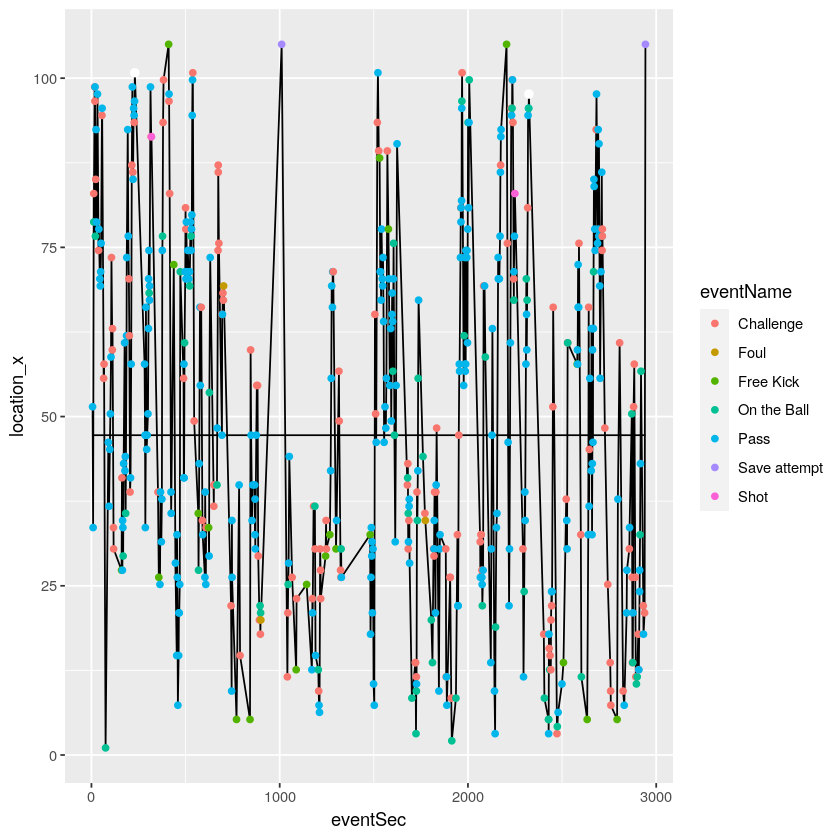

In [167]:
ggplot(firsthalf) +
    geom_line(aes(eventSec, location_x))  + 
    geom_line(aes(eventSec, median(location_x))) + 
    geom_point(aes(eventSec, location_x, colour=eventName))+ 
    geom_point(data=firsthalf[firsthalf$subEventName=='Goal',], aes(eventSec, location_x), colour='white', size=2)

ERROR while rich displaying an object: Error: Insufficient values in manual scale. 25 needed but only 5 provided.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.d

[1] 4.275
[1] 3
[1] 0.0625
[1] 1026
[1] 16


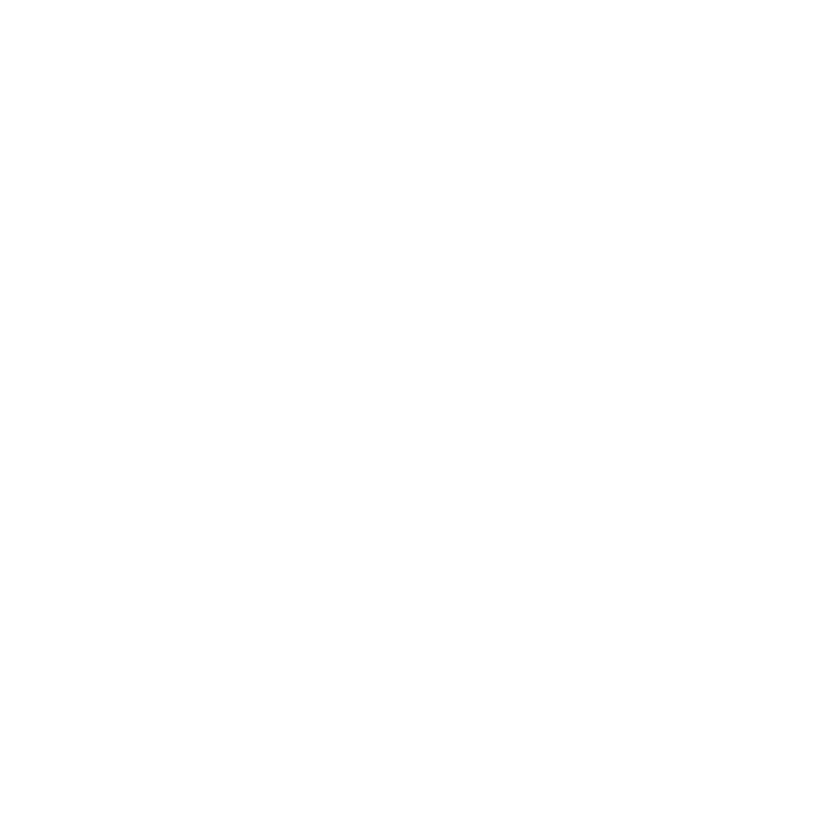

In [197]:
ggraph(g, 'linear') + 
    geom_edge_arc(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name),
                     color=data$subEventName,
                     ), 
                  arrow=arrow(length=unit(4,'mm'),
                             ), 
#                   color='grey', 
#                   width=0.7, 
                  fold=F) +
    geom_edge_loop(
        color='purple', 
        linetype='dashed') +
    geom_node_point(size=2, color='black', fill='white') +
    geom_node_text(aes(label = name), repel=T, angle=90, hjust=2, ) +
    scale_edge_colour_manual(values=c('black', 'red', 'blue', 'grey', 'purple'), name='Event Type') +
    theme_void()
print(edge_density(g), loops=T)
print(diameter(g))
print(mean(page_rank(g)$vector))
print(length(E(g)))
print(length(V(g)))
# print(diversity(g, weights=g$weight))

In [97]:
edge_density(g)

[1] 0.3194444

In [30]:
vector

[1] 1 1 1

In [15]:
length(unique(events[events$possession == goal_seqs[1],]$source))

[1] 6

In [ ]:
# draw mean position team passing network

In [125]:
events[1,]

,X,matchId,matchPeriod,team,source,eventName,subEventName,tags,accurate,in_play,⋯,to_team,location_x,location_y,target_x,target_y,minute,seconds,time,home_or_away,FirstXI
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>
1,0,2499719,1H,Arsenal,A. Lacazette,Pass,Simple pass,"['accurate', nan, nan, nan, nan, nan]",1,0,⋯,Home,51.45,34.68,32.55,14.96,0,2,00:02,Home,True


In [135]:
drawpassmap <- function(game_id, team_name, team_colour, flip=F, lower_threshold=5, high_threshold=10) {

game <- events[events$matchId == game_id,]
firstXI <- game[game$FirstXI == 'True',]
mean_positions <- firstXI[firstXI$location_x>0 & firstXI$location_y>0 & firstXI$location_x<105 & firstXI$location_y<68,] %>% 
    group_by(team, matchId, source) %>%
      dplyr::summarise(x_mean = mean(location_x), y_mean = mean(location_y)) %>% 
      ungroup() %>%
      mutate(team = as.factor(team), id = as.factor(matchId)) %>%
      as.data.frame()
    


pass_counts <- ddply(data.frame(game$source, game$target),.(game.source,game.target),nrow)
names(pass_counts) <- c('source','target','passcount')
step1 <- merge(mean_positions, pass_counts, by='source')
step2 <- step1[,c(1,4,5,7,8)]
names(step2)[2:3] <- c('source_x','source_y')
names(mean_positions)[3] <- 'target'
step3 <- merge(mean_positions, step2, by='target')
team <- step3[step3$team==team_name,]
    
if (flip==T) {
    team$source_x <- 105 - team$source_x
    team$x_mean <- 105 - team$x_mean
    team$source_y <- 68 - team$source_y
    team$y_mean <- 68 - team$y_mean
    mean_positions$x_mean <- 105 - mean_positions$x_mean
    mean_positions$y_mean <- 68 - mean_positions$y_mean
}

return (soccerPitch() +
    geom_segment(data=team[team$passcount>=lower_threshold,], size=1, colour=team_colour,
                 aes(x=source_x, y=source_y, xend=x_mean, yend=y_mean, alpha=passcount)) +
    geom_segment(data=team[team$passcount>=high_threshold,], size=1.5, colour='black',
                 aes(x=source_x, y=source_y, xend=x_mean, yend=y_mean, alpha=passcount)) +
    geom_label_repel(data = mean_positions[mean_positions$team==team_name,], 
                     aes(x_mean, y_mean, label = target), label.padding=0.1, size=2.3, alpha=1) +
    geom_point(data=team, aes(x_mean, y_mean,), fill=team_colour, colour='black', pch=21, size=3) 
        )
}

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


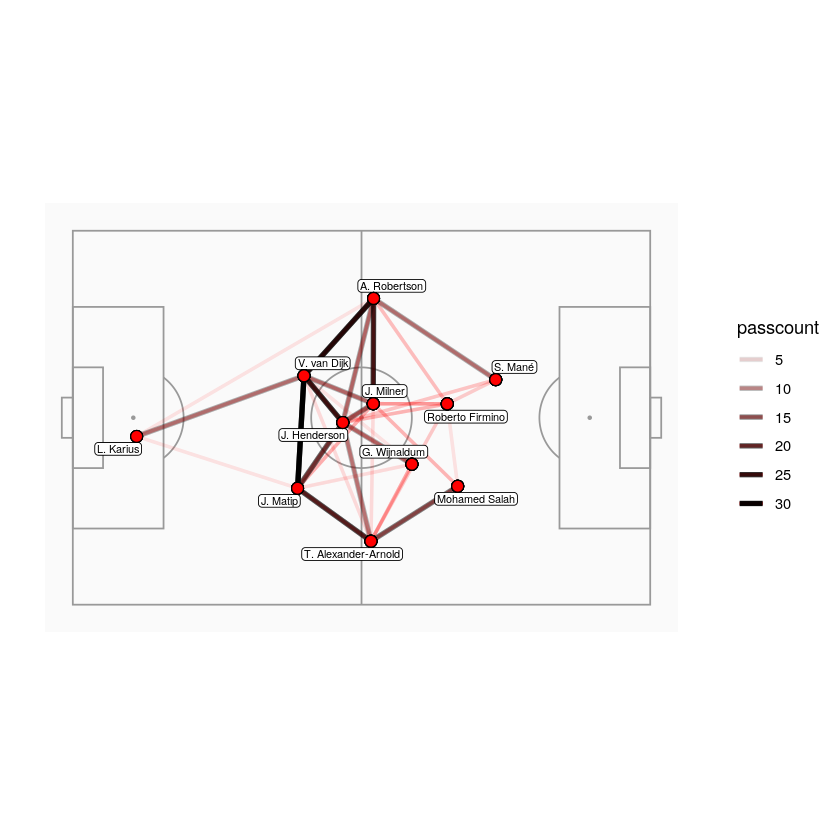

In [136]:
game_id <- '2500032'
drawpassmap(game_id, 'Liverpool', 'red')

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


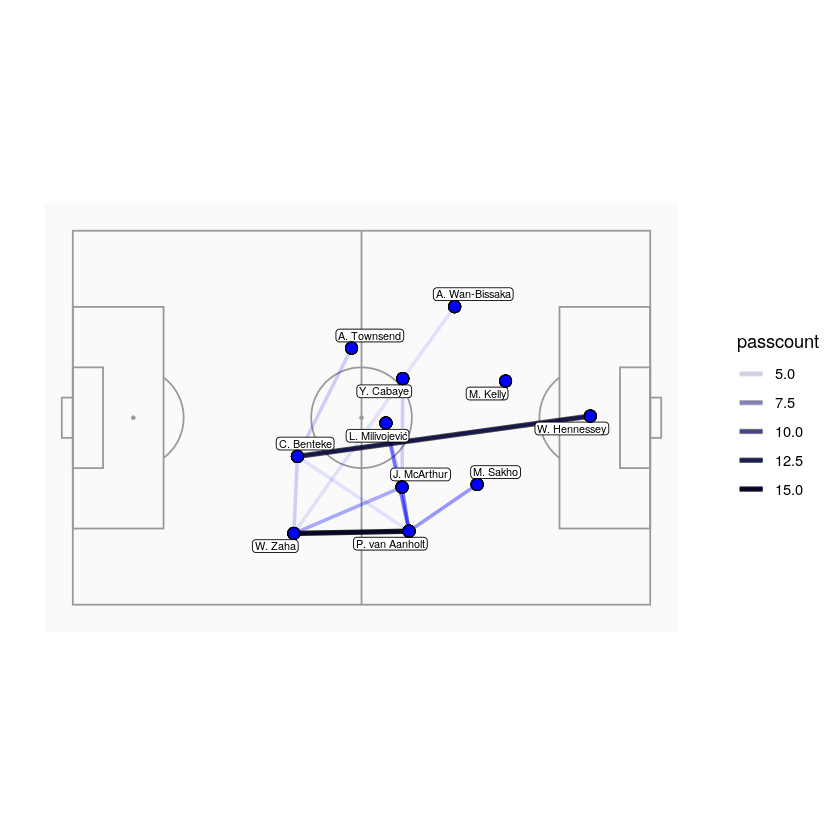

In [141]:
game_id <- '2500032'
drawpassmap(game_id, 'Crystal Palace','blue', flip=T, 5)

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


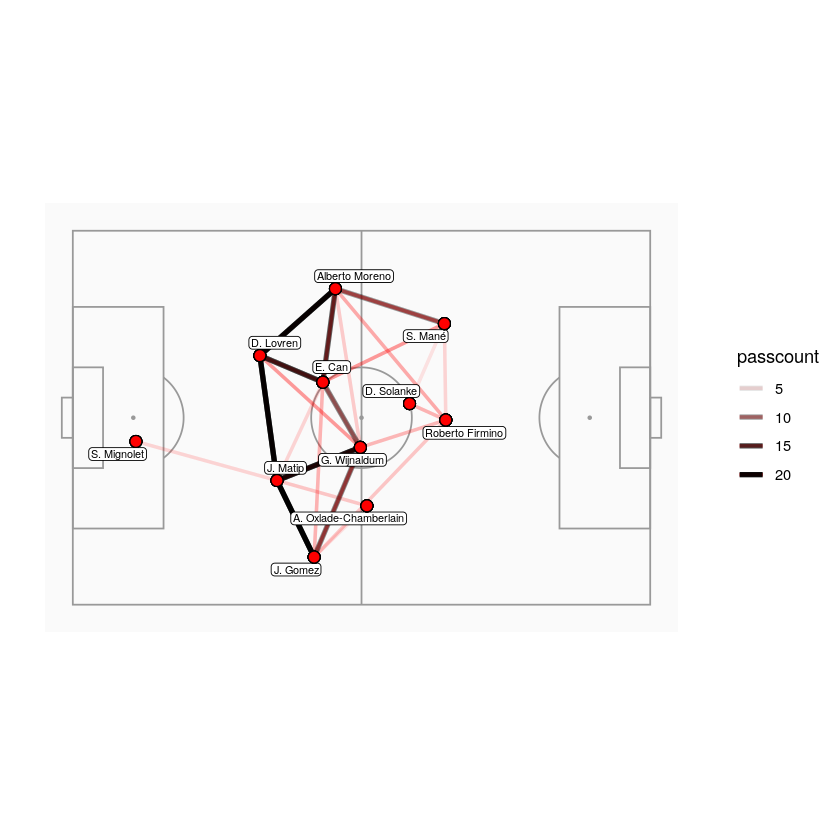

In [135]:
game_id <- '2499858'

drawpassmap(game_id)

In [115]:
liv_matches <- unique(events[events$team == 'Liverpool',]$matchId)

In [149]:
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)
`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)
`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


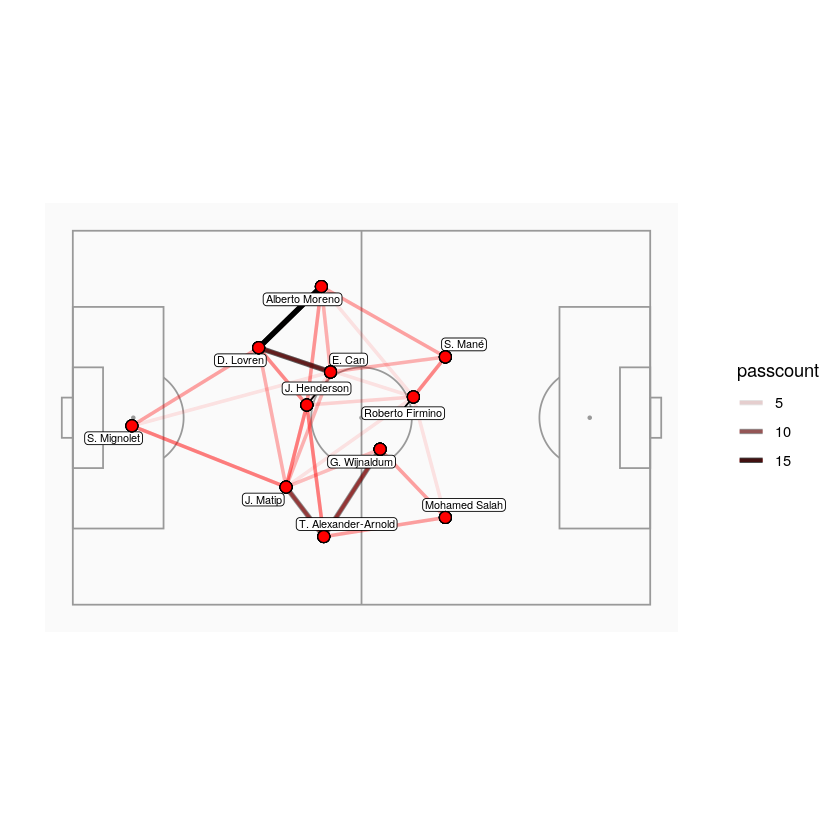

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


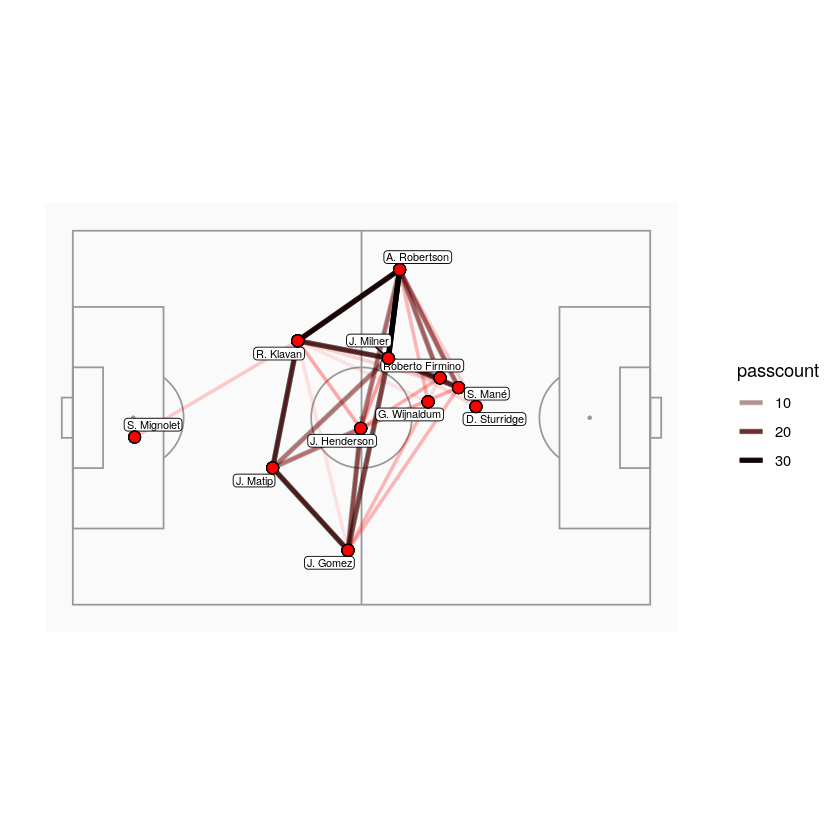

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


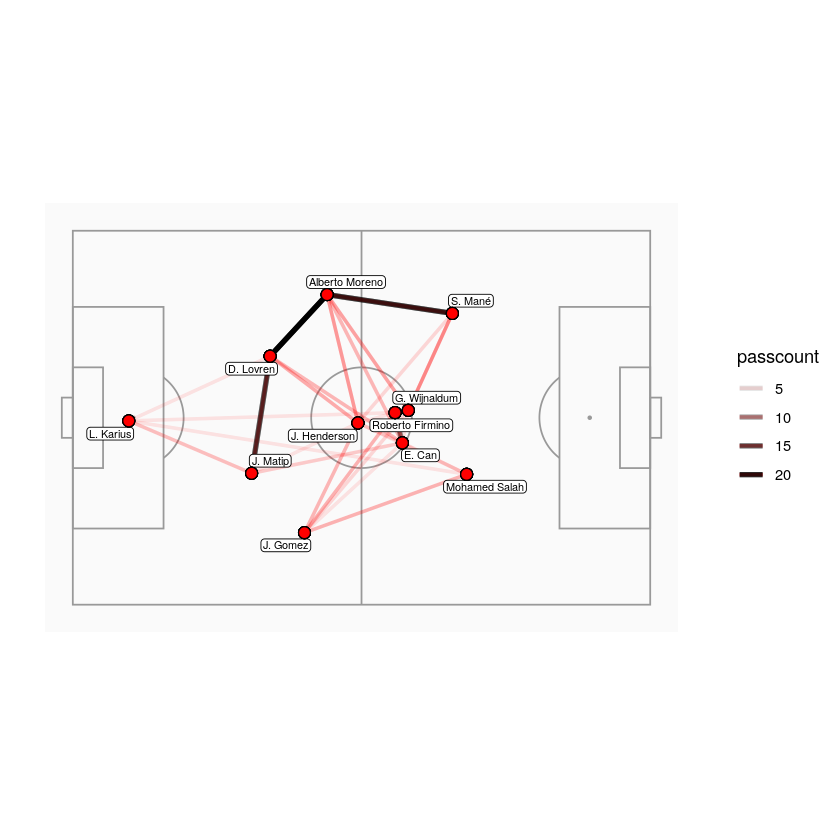

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


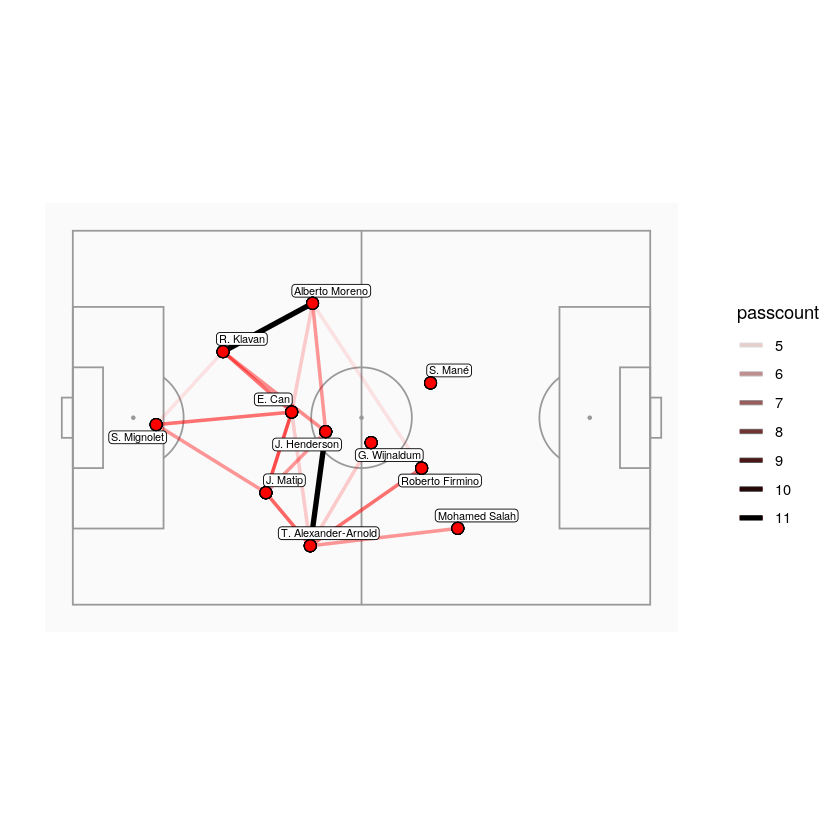

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


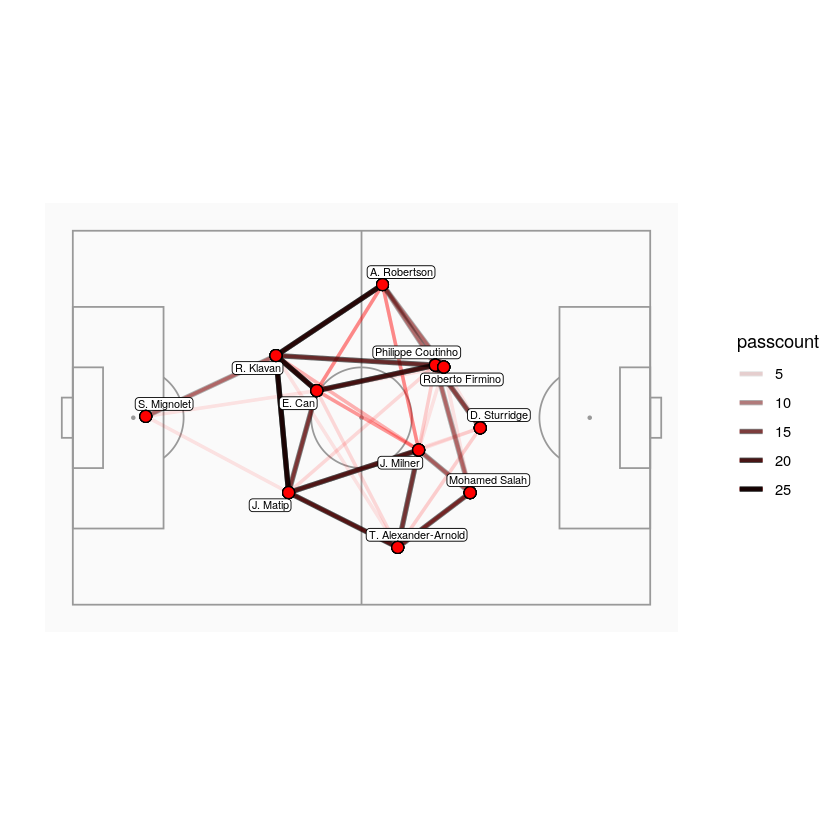

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


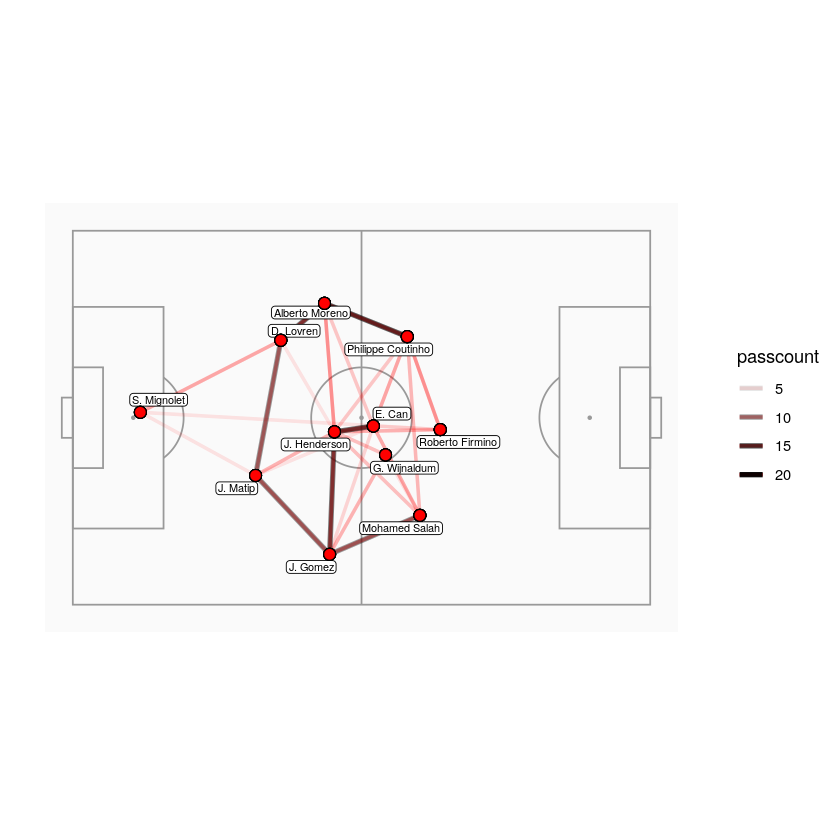

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


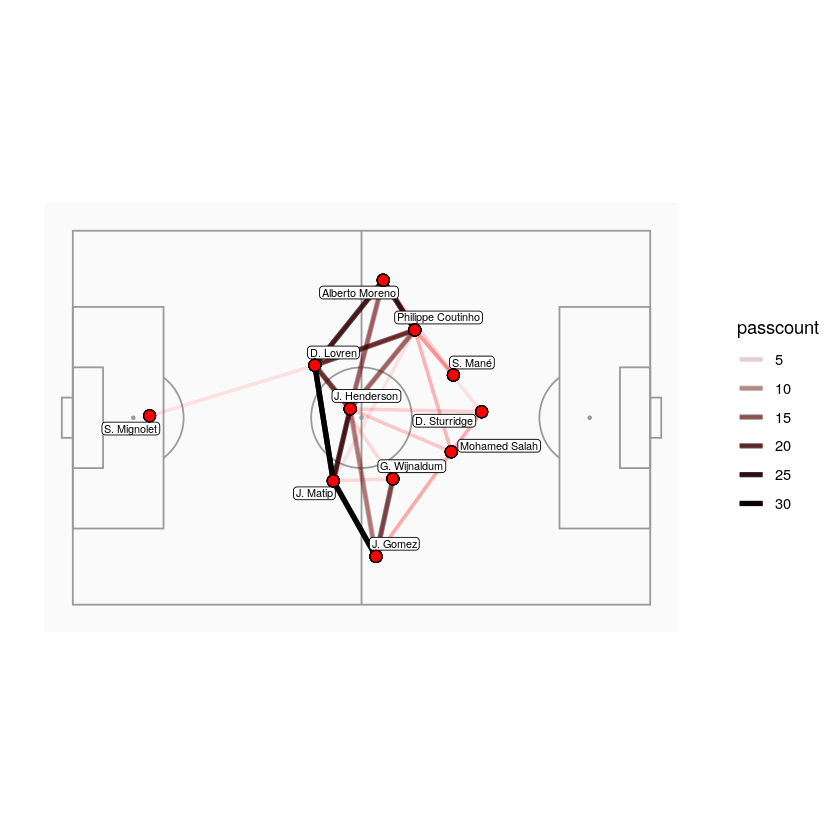

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


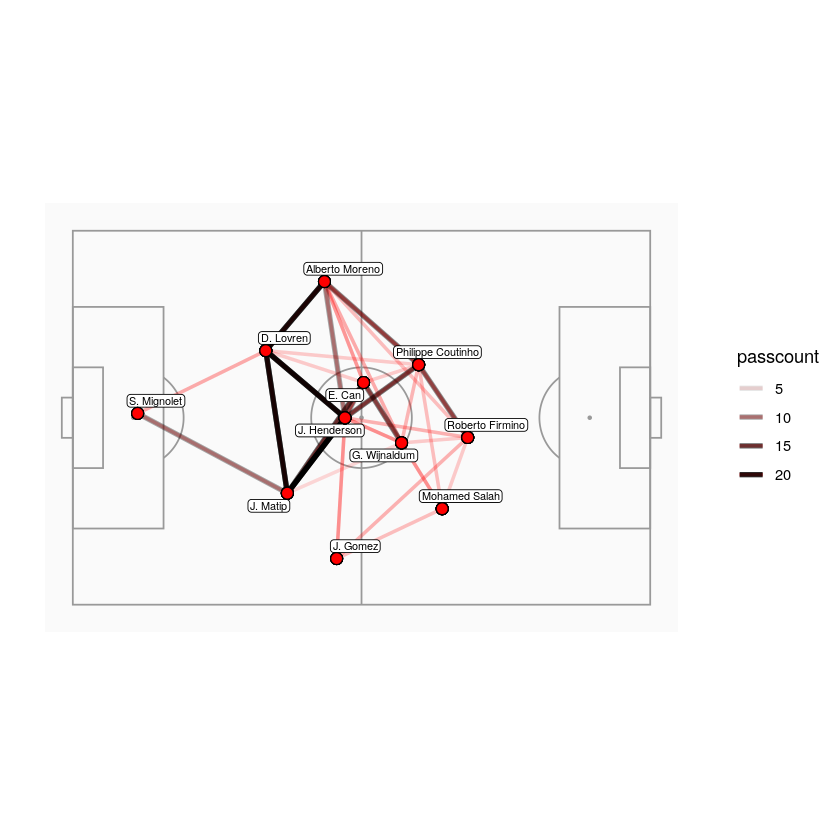

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


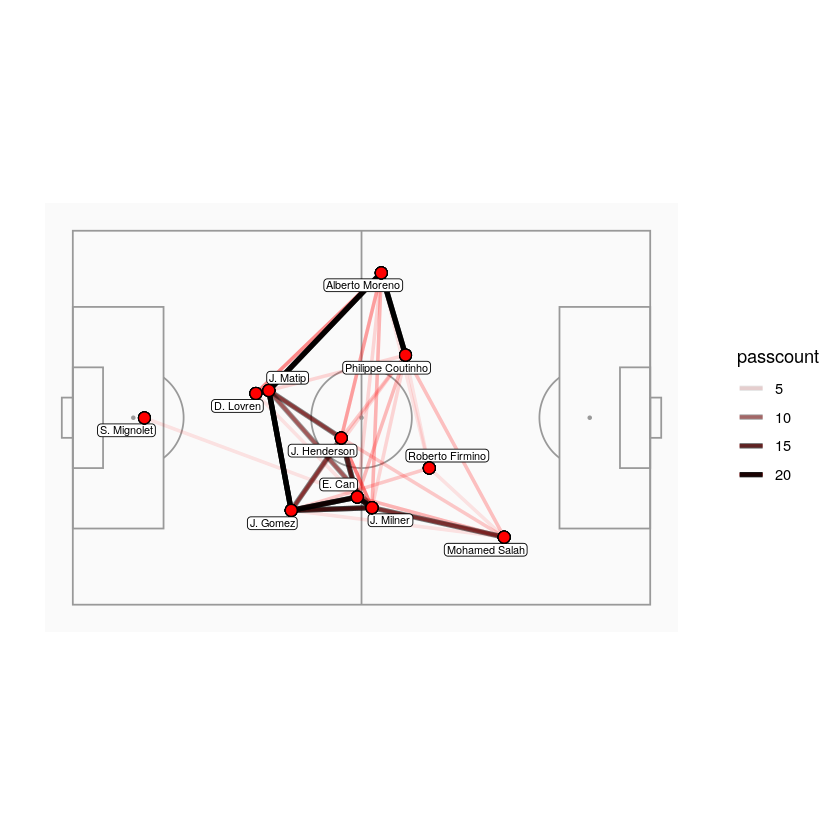

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


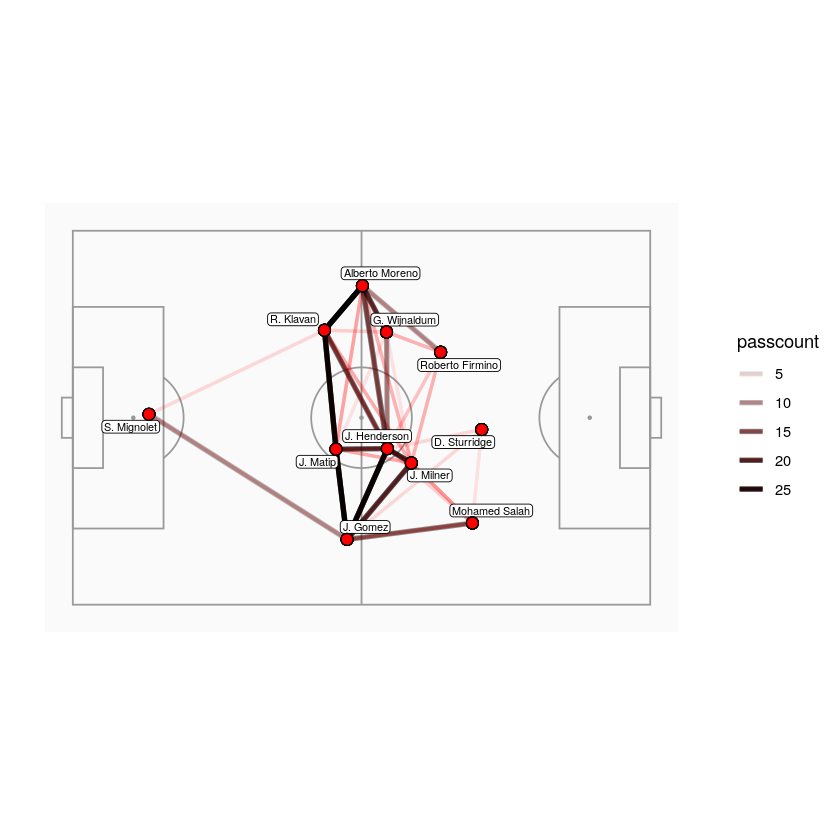

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


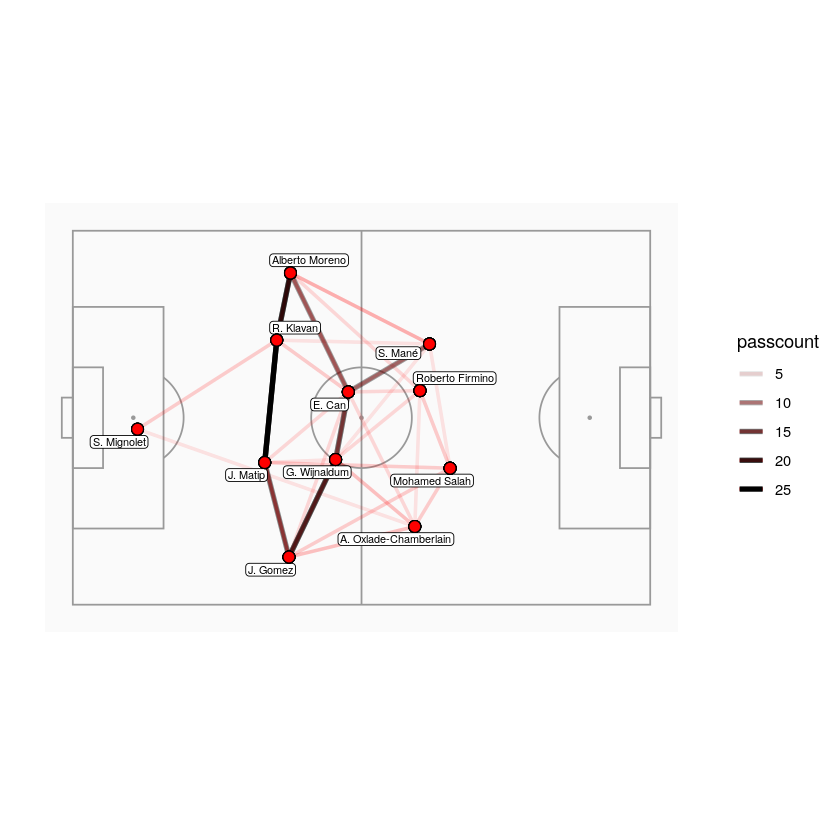

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


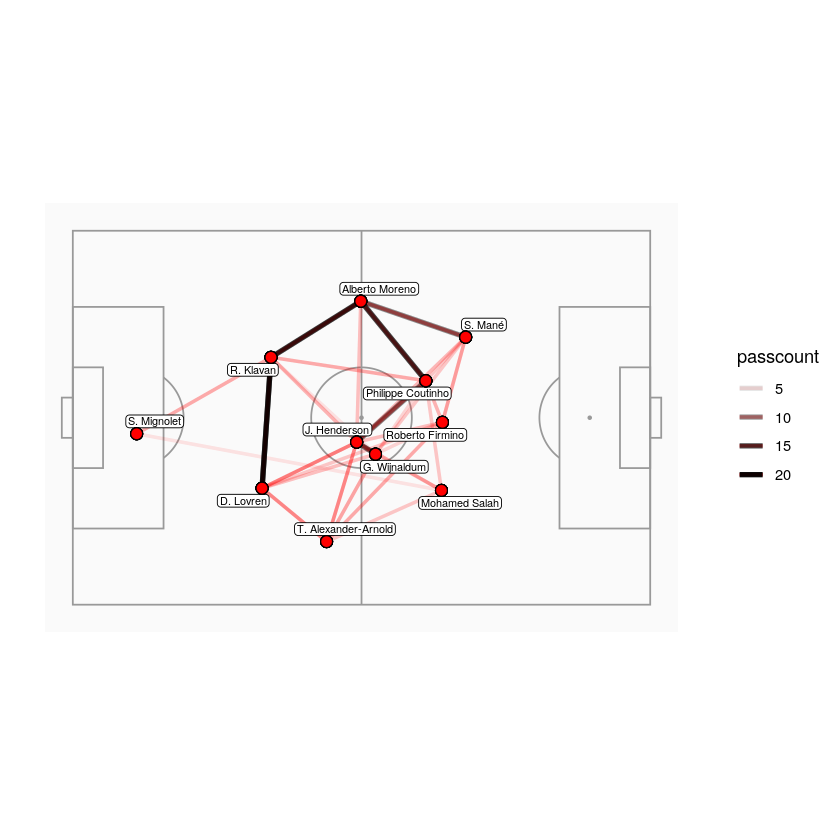

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


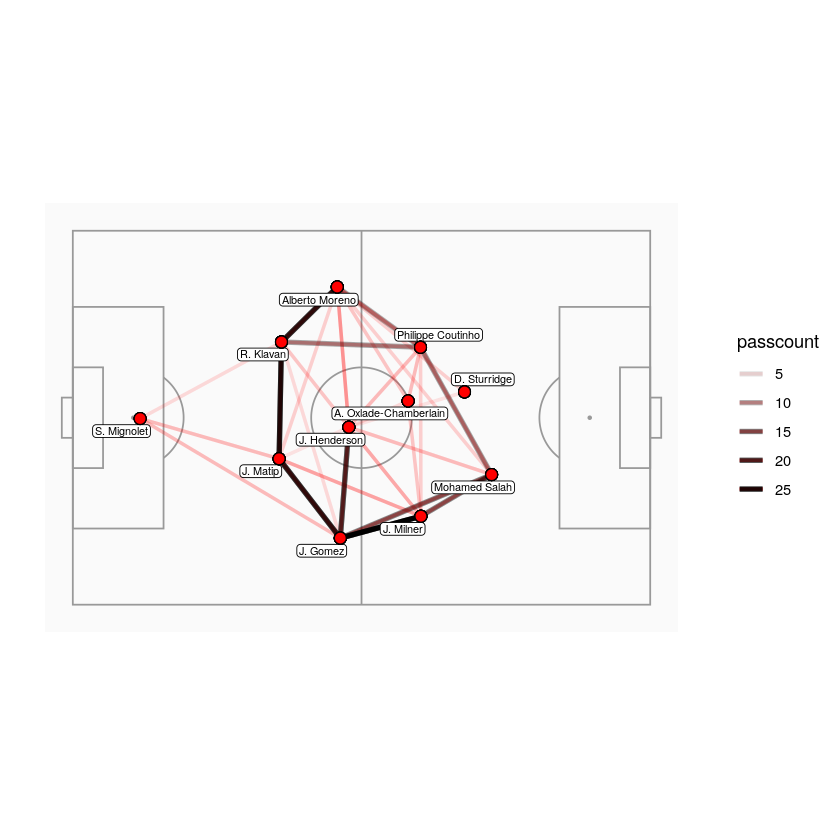

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


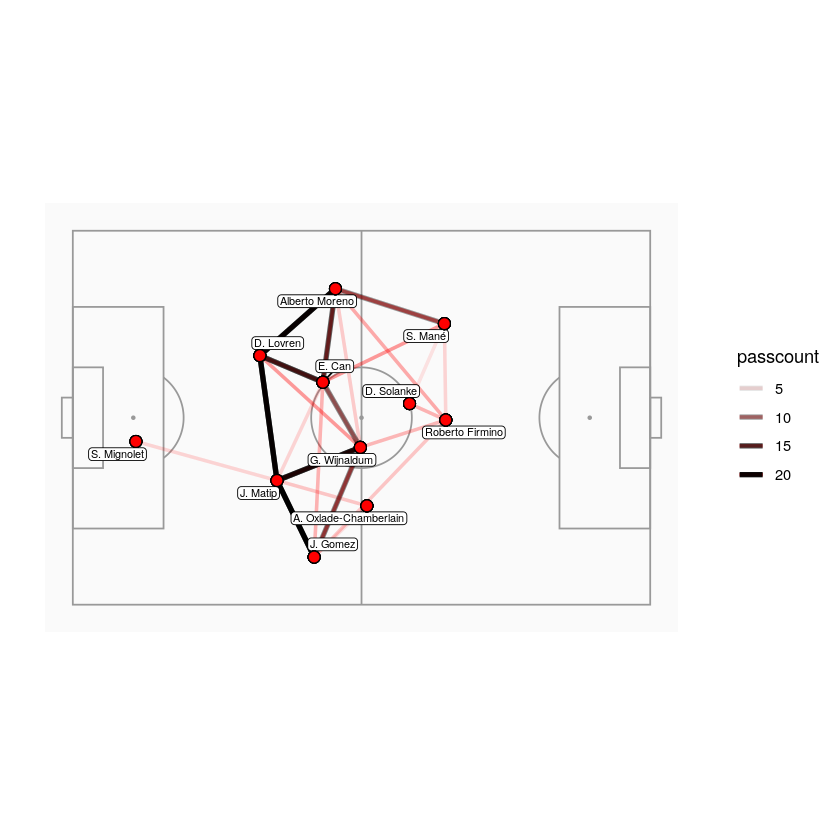

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


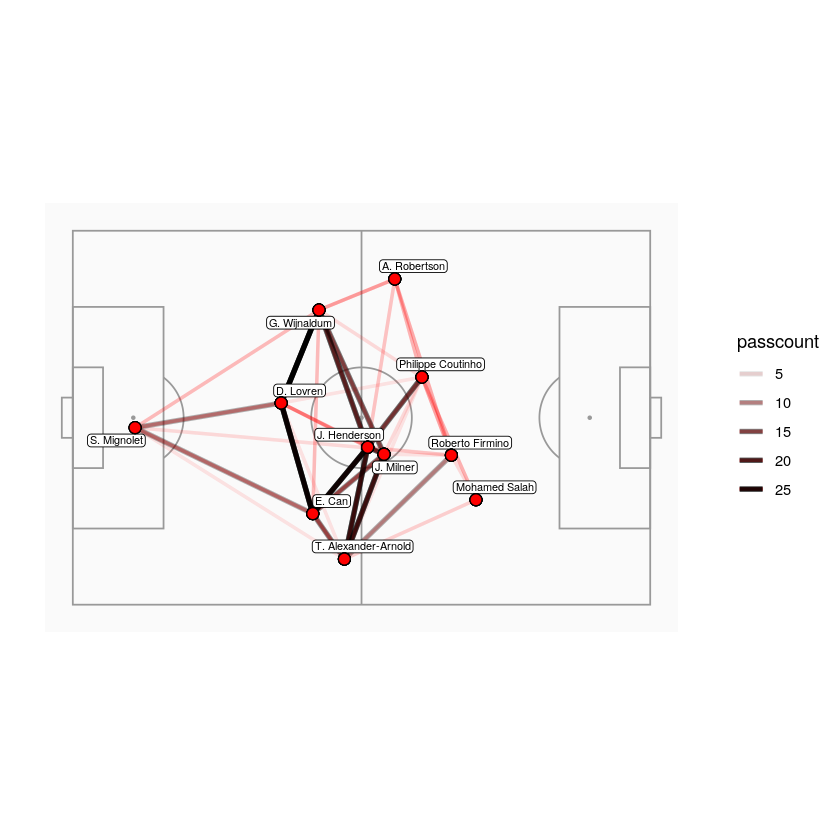

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


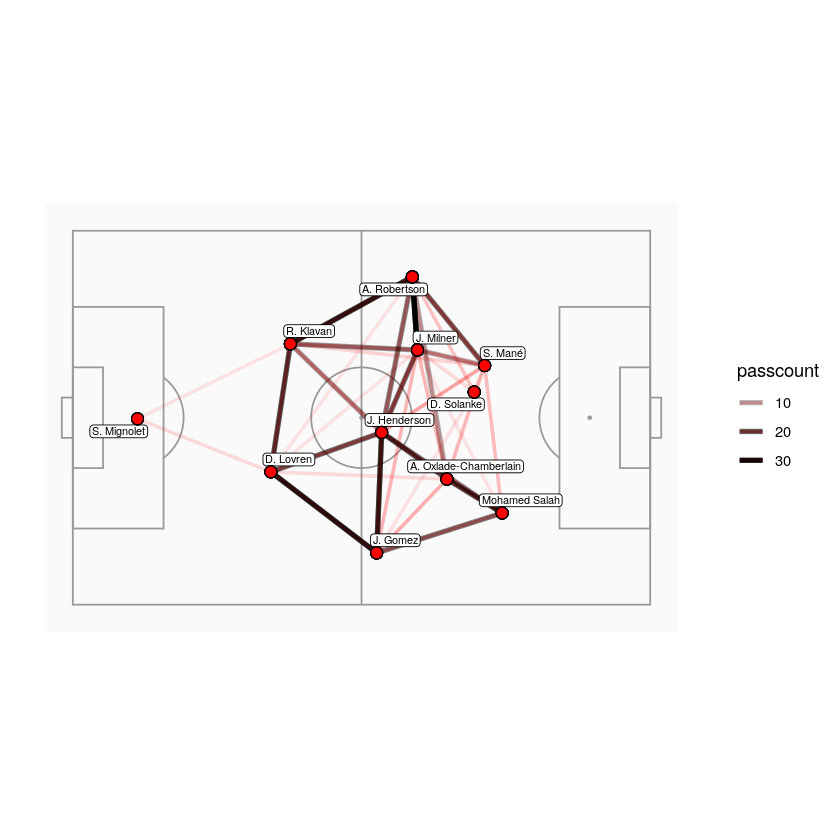

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


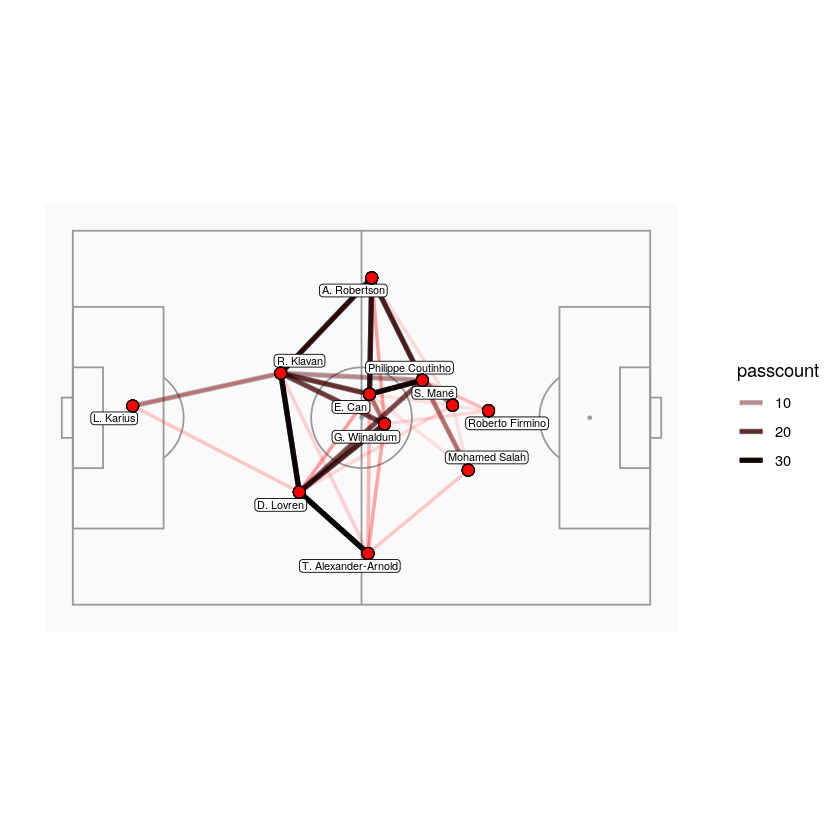

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


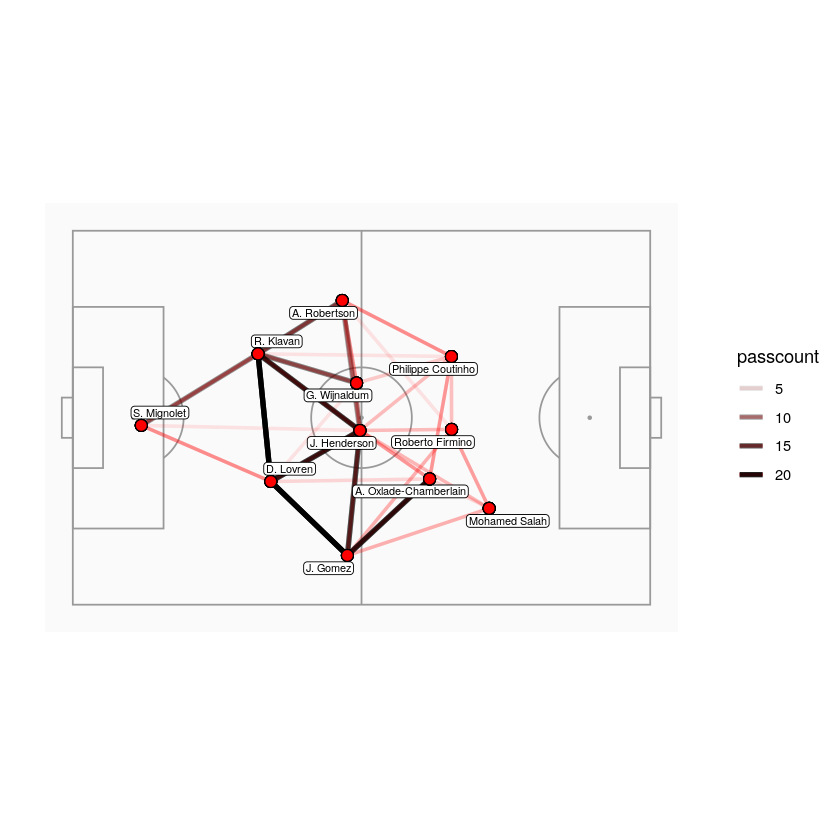

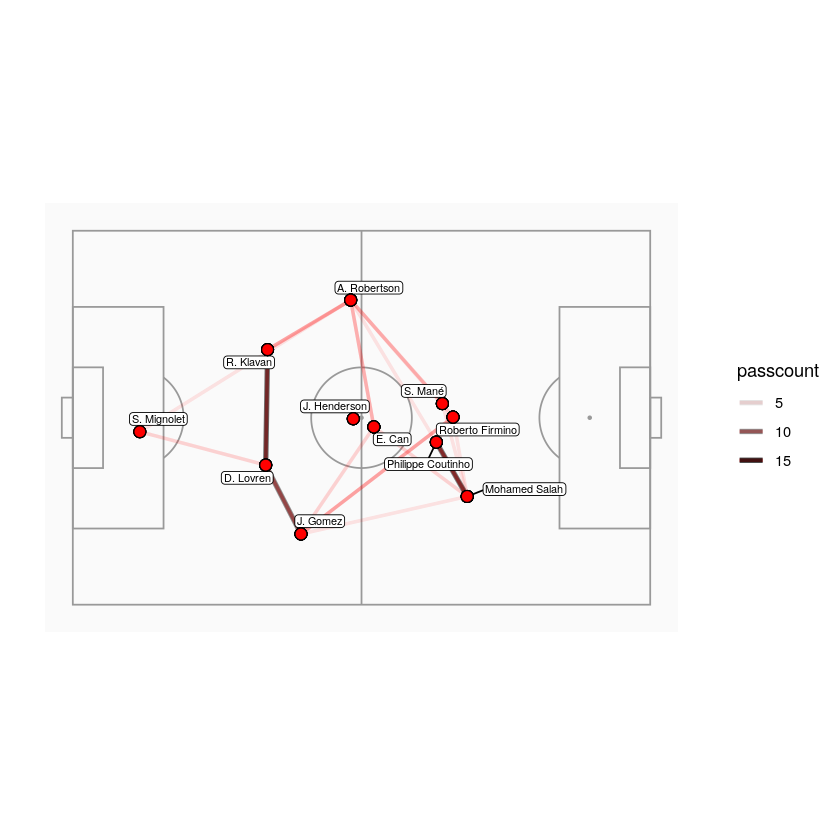

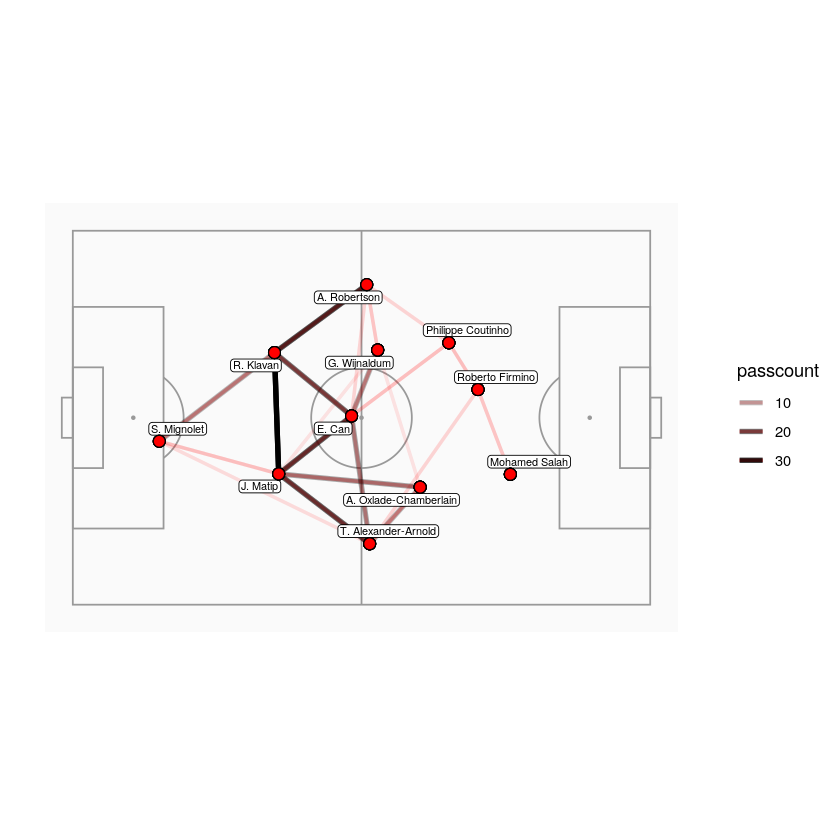

In [156]:
for (i in 1:20) { print(drawpassmap(liv_matches[i]))}

In [300]:
grid.arrange(drawpassmap(liv_matches[26]), drawpassmap(liv_matches[7]), drawpassmap(liv_matches[19]), nrow=3)

ERROR: Error in grid.arrange(drawpassmap(liv_matches[26]), drawpassmap(liv_matches[7]), : could not find function "grid.arrange"




|                    | page_rank.g..vector...100| centr_eigen.g..vector...100| hub_score.g..vector...100| authority_score.g..vector...100|
|:-------------------|-------------------------:|---------------------------:|-------------------------:|-------------------------------:|
|J. Milner           |                 11.150101|                    91.87500|                 100.00000|                        95.29368|
|Roberto Firmino     |                 12.476003|                    71.60981|                  64.69179|                        84.86866|
|J. Henderson        |                 13.652823|                   100.00000|                  97.11699|                       100.00000|
|L. Karius           |                  3.171287|                    28.27790|                  26.49274|                        30.96941|
|S. Mané             |                  8.403017|                    48.50874|                  49.96332|                        49.94581|
|V. van Dijk         |   

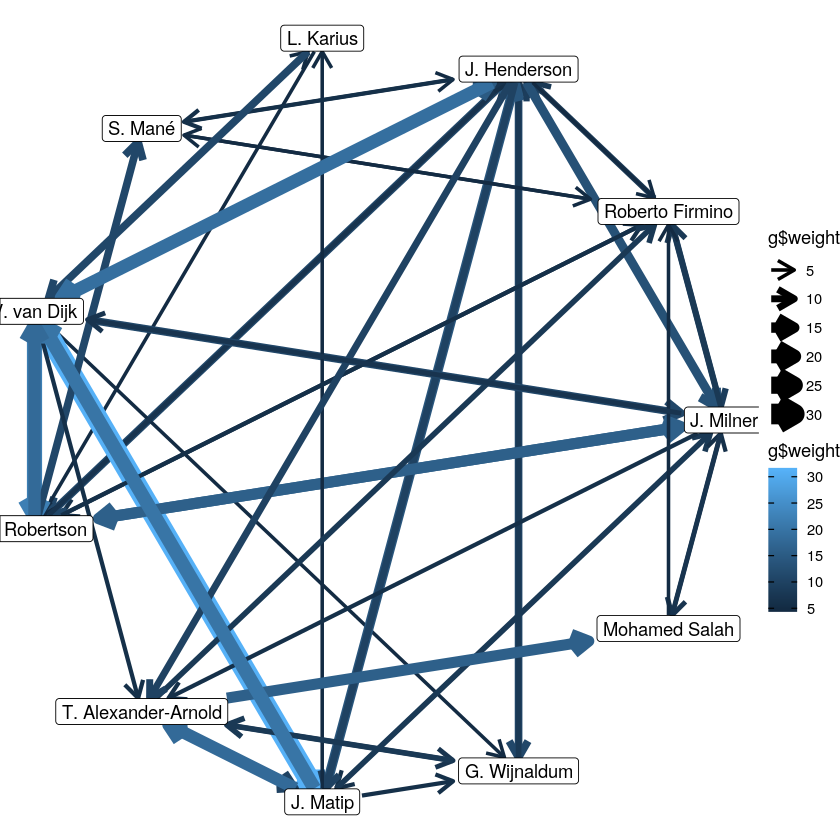

In [515]:
df <- liv[liv$passcount>=5,]#>5,]
nodes <- unique(c(as.character(df$source)))
edges <- data.frame(df$source, df$target)
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)

print(kable(data.frame(page_rank(g)$vector*100, centr_eigen(g)$vector*100, hub_score(g)$vector*100, authority_score(g)$vector*100)))
g$weight <- df$passcount
ggraph(g, layout='circle') + 
    geom_edge_link(aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name),
                     color = g$weight, width=g$weight), 
                  arrow=arrow(length=unit(4,'mm')), ) +
    geom_node_label(aes(label = name), ) +
    theme_void()

In [302]:
g[]

   [[ suppressing 31 column names ‘D. Lovren’, ‘S. Mané’, ‘S. Mignolet’ ... ]]


31 x 31 sparse Matrix of class "dgCMatrix"
                                                                            
D. Lovren             126  53 61 153 135 168 117 . 177 117  66  36 .  77  79
S. Mané                30 309  .  10  65  25  49 .  77  87 107  74 .  97  28
S. Mignolet            61  17 31  51  41  20  14 .  29  11  38  21 1   7  40
J. Matip              158  32 57 185 142  94  48 . 157  77  72  65 .  94 209
E. Can                127  93 29 133 290  91  54 .  89  90  90  70 . 110 105
T. Alexander-Arnold   156  35 23  75  80 122   2 . 117  55 121 141 2  62  10
Alberto Moreno         94  69 16  33  70   4  91 .  87  65  74  32 2  39   7
                       29  39  7  35  41  24  18 .  34  39  54  40 .  27  33
J. Henderson          148  78 18 108 101 134  88 . 141 120  99 121 1 140 179
G. Wijnaldum          110  71 13  76  91  70  62 . 132 260  57  60 .  64  80
Roberto Firmino        23 100  1  24  96  53  28 . 108  92 402 129 .  79  32
Mohamed Salah           8  60  . 

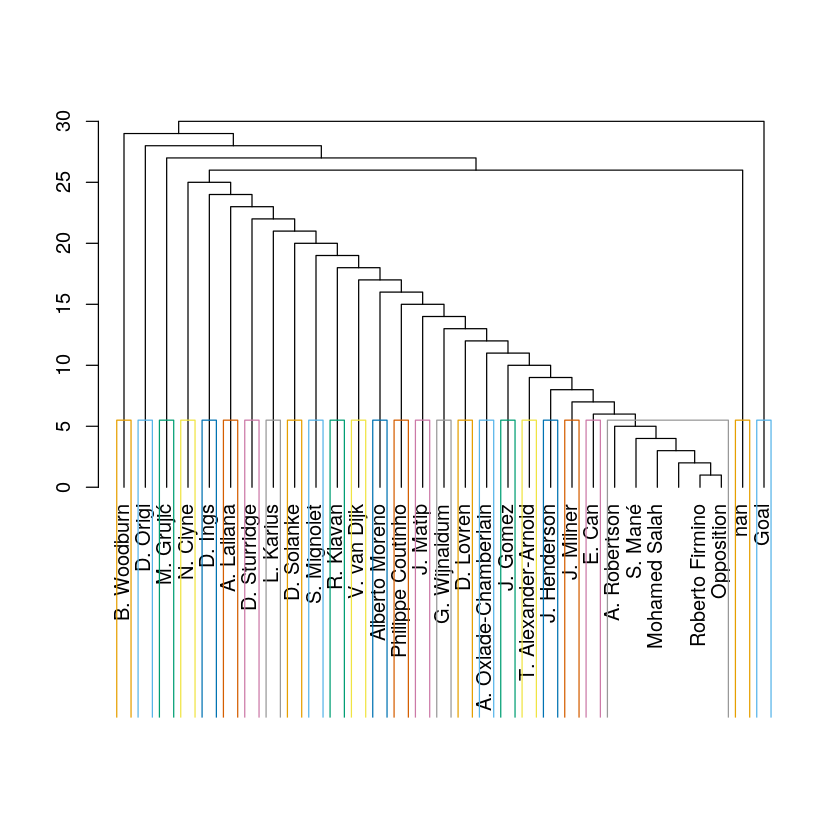

In [301]:
fc <- cluster_edge_betweenness(g)
plot_dendrogram(fc)

In [511]:
# assess network metrics: centrality, pagerank, ...
keywords: graph, network, nodes, edges, degree, adjacency matrix, closeness = reciprocal of average distance to other vertices,
betweenness = number of shortest paths going through a vertex
eigenvector centrality = number of adjacent edges weighted by their 'goodness' (??)
Burt's constraint ~ benefit of brokering between other actors
transitivity ~ are my friends friends of each other
sensitivity of centrality measures ~ remove and add two random nodes
finding community structure in very large networks. fast-greedy algorithm
spinglass algorithm ~ community mechanics of community detection

pagerank
clustering
maximal cliquee
@JPenaTouchette2012

ERROR: Error in parse(text = x, srcfile = src): <text>:2:16: unexpected ','
1: # assess network metrics: centrality, pagerank, ...
2: keywords: graph,
                  ^


In [526]:
pos_seqs <- unique(events[events$team=='Liverpool',]$possession)

In [532]:
tail(events[events$possession == id,],1)$subEventName

[1] Goal
37 Levels:  Acceleration Air duel Ball out of the field Clearance ... Whistle

In [509]:
data.frame(page_rank(g)$vector*100, centr_eigen(g)$vector*100, hub_score(g)$vector*100, authority_score(g)$vector*100)

,page_rank.g..vector...100,centr_eigen.g..vector...100,hub_score.g..vector...100,authority_score.g..vector...100
,<dbl>,<dbl>,<dbl>,<dbl>
J. Milner,11.150101,91.87500,100.00000,95.29368
Roberto Firmino,12.476003,71.60981,64.69179,84.86866
J. Henderson,13.652823,100.00000,97.11699,100.00000
L. Karius,3.171287,28.27790,26.49274,30.96941
S. Mané,8.403017,48.50874,49.96332,49.94581
V. van Dijk,8.836602,83.65591,96.52270,82.95901
A. Robertson,11.874402,79.24296,77.51382,88.44988
T. Alexander-Arnold,9.514667,69.92582,69.02973,83.58909
J. Matip,7.154509,74.18965,82.85201,76.92019


In [469]:
page_rank(g)$vector*100

J. Milner     Roberto Firmino        J. Henderson           L. Karius 
          11.150101           12.476003           13.652823            3.171287 
            S. Mané         V. van Dijk        A. Robertson T. Alexander-Arnold 
           8.403017            8.836602           11.874402            9.514667 
           J. Matip        G. Wijnaldum       Mohamed Salah 
           7.154509            8.329968            5.436622

In [ ]:
# draw general markov graph: goal-home-away-goal

In [51]:
nodes <- unique(c(as.character(events$to_team)))

In [10]:
c('Kick Off', nodes)

[1] "Kick Off"  "Home"      "Away"      "Home Goal" "Away Goal"

In [52]:
edges <- data.frame(events$home_or_away, events$to_team)

In [54]:
g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)

In [55]:
g[]

4 x 4 sparse Matrix of class "dgCMatrix"
            Home   Away Home Goal Away Goal
Home      226809  97850       568        15
Away      101958 215516        14       420
Home Goal      .      .         .         .
Away Goal      .      .         .         .

In [ ]:
m <- g[]

In [ ]:
m[1,]/sum(m[1,])

In [ ]:
m[2,]/sum(m[2,])

In [13]:
simpleg <- simplify(g, remove.loops=F)

In [89]:
simpleg$probs <- g[]

In [95]:
simpleg$probs

4 x 4 sparse Matrix of class "dgCMatrix"
            Home   Away Home Goal Away Goal
Home      226809  97850       568        15
Away      101958 215516        14       420
Home Goal      .      .         .         .
Away Goal      .      .         .         .

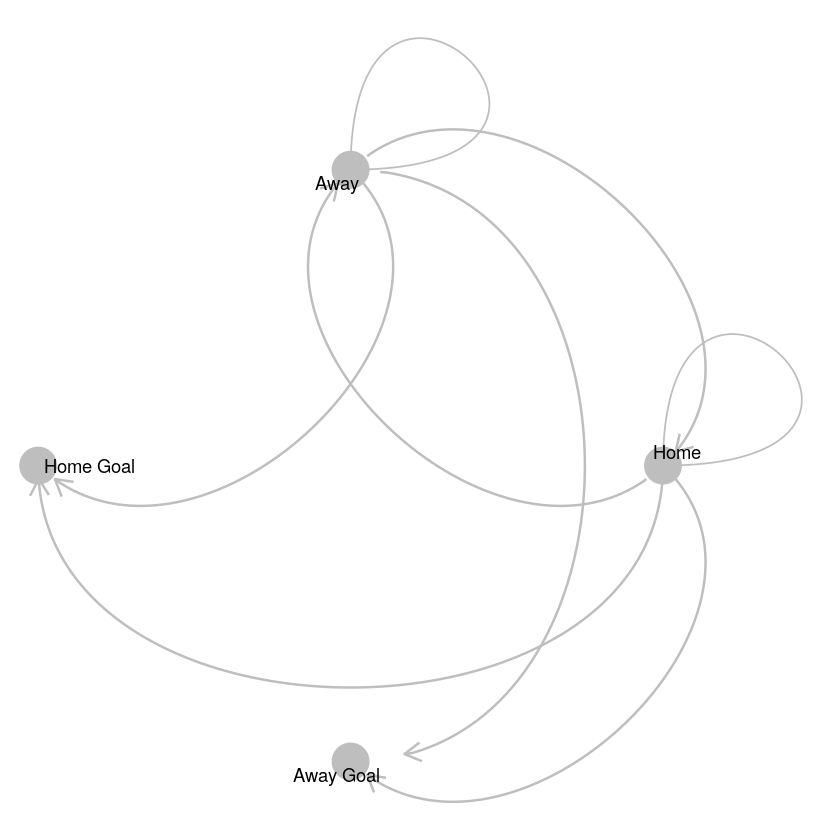

In [36]:
ggraph(simpleg, layout='circle') + 
    geom_edge_arc( aes(start_cap = label_rect(node1.name), 
                       end_cap = label_rect(node2.name),
                     color = weights), 
                  arrow=arrow(length=unit(4,'mm')), 
                  color='grey', width=0.7, fold=F) +
    geom_edge_loop(color='grey' ) +
    geom_node_point(size=10, color='grey', fill='white') +
    geom_node_text(aes(label = name), repel=T, ) +
    theme_void()

In [103]:
simpleg$weights

4 x 4 sparse Matrix of class "dgCMatrix"
            Home   Away Home Goal Away Goal
Home      226809  97850       568        15
Away      101958 215516        14       420
Home Goal      .      .         .         .
Away Goal      .      .         .         .

In [ ]:
dput(simpleg$weights)

In [ ]:
wm <- new("dgCMatrix", i = c(0L, 1L, 3L, 0L, 1L, 2L, 0L, 1L, 0L, 1L
), p = c(0L, 3L, 6L, 8L, 10L), Dim = c(4L, 4L), Dimnames = list(
    c("Home", "Away", "Home Goal", "Away Goal"), c("Home", "Away", 
    "Home Goal", "Away Goal")), x = c(0.697354585201173, 0.320715427104697, 
1, 0.300852903376563, 0.677919398064849, 1, 0.00174639191740304, 
4.40378977565837e-05, 4.61195048609958e-05, 0.00132113693269751
), factors = list())

In [ ]:
as.matrix(wm)[5,] <- c(0.5,0.5,0,0)

In [ ]:
wdf <- as.data.frame(as.matrix(wm))

In [ ]:
wdf[5,] <- c(0.5,0.5,0,0)

In [ ]:
twdf <- data.frame(as.matrix(t(wdf)))

In [ ]:
twdf[5,] <- c(0,0,0,0, 0)

In [ ]:
names(twdf)[5] <- 'Kickoff'

In [ ]:
ttwdf<- data.frame(t(twdf))

In [ ]:
names(ttwdf)[5] <- 'Kickoff'

In [ ]:
adj_m <- graph_from_adjacency_matrix(as.matrix(ttwdf)*10^7)

In [ ]:
plot(adj_m)

In [ ]:
dput(ttwdf*1000000)

In [ ]:
simpleg$weights[1,] <- simpleg$weights[1,]/sum(simpleg$weights[1,])
simpleg$weights[2,] <- simpleg$weights[2,]/sum(simpleg$weights[2,])

In [ ]:
simpleg$weights[3,] <- c(0,1,0,0)
simpleg$weights[4,] <- c(1,0,0,0)

In [ ]:
simpleg$weights

In [ ]:
# include spatial / pitch-position data
g[]

In [41]:
centr_eigen(g)

$vector
 [1] 0.004449726 0.017733321 0.066222185 0.179957184 0.650954156 1.000000000
 [7] 0.414265005 0.269087650 0.072384507 0.019383499 0.004863797

$value
[1] 3.985261

$options
$options$bmat
[1] "I"

$options$n
[1] 11

$options$which
[1] "LA"

$options$nev
[1] 1

$options$tol
[1] 0

$options$ncv
[1] 0

$options$ldv
[1] 0

$options$ishift
[1] 1

$options$maxiter
[1] 1000

$options$nb
[1] 1

$options$mode
[1] 1

$options$start
[1] 1

$options$sigma
[1] 0

$options$sigmai
[1] 0

$options$info
[1] 0

$options$iter
[1] 9

$options$nconv
[1] 1

$options$numop
[1] 29

$options$numopb
[1] 0

$options$numreo
[1] 13


$centralization
[1] 0.9222999

$theoretical_max
[1] 9

In [40]:
data.frame(page_rank(g)$vector)*10

,page_rank.g..vector
,<dbl>
J. Matip,0.2128503
L. Karius,0.3937731
V. van Dijk,0.9522738
J. Milner,0.6175667
T. Alexander-Arnold,1.2450949
A. Oxlade-Chamberlain,2.3873547
J. Henderson,0.7420156
A. Robertson,0.7201632
Roberto Firmino,0.8249890


In [39]:
data.frame(betweenness(g))

,betweenness.g.
,<dbl>
J. Matip,0
L. Karius,9
V. van Dijk,16
J. Milner,21
T. Alexander-Arnold,25
A. Oxlade-Chamberlain,25
J. Henderson,0
A. Robertson,21
Roberto Firmino,16


In [38]:
data.frame(closeness(g)*100)

Warning message in closeness(g):
“At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs”

,closeness.g....100
,<dbl>
J. Matip,2.0000000
L. Karius,1.9607843
V. van Dijk,1.8867925
J. Milner,1.7857143
T. Alexander-Arnold,1.6666667
A. Oxlade-Chamberlain,1.7543860
J. Henderson,1.6393443
A. Robertson,1.2048193
Roberto Firmino,1.0989011


In [37]:
alpha.centrality(g)

J. Matip             L. Karius           V. van Dijk 
                    1                     2                     3 
            J. Milner   T. Alexander-Arnold A. Oxlade-Chamberlain 
                    4                    -7                   -12 
         J. Henderson          A. Robertson       Roberto Firmino 
                   -6                   -11                   -10 
        Mohamed Salah                  Goal 
                   -9                    -8